# STAT 201 Project Proposal: Violent Crime Incidents in three Vancouver Neighbourhoods

### Group 37: Elias Khan, Weihao (Beren) Sun, Elaine Zhou, Nika Martinussen

## Introduction

Understanding how crime incidences vary by geographic region is an ongoing area of study by researchers. This report looks at the incidence of violent crime activity within different communities of Vancouver, a populous city in British Columbia, Canada.

An examination of violent crimes in Vancouver in 1996, found that the highest rates of violent crimes were concentrated in the Downtown Eastside and surrounding neighbourhoods, with violent crime rates decreasing as one moved further away from this epicenter (Andreson, 2017). Further, between 2001 and 2008 in Vancouver, geographic hotspots for violent trauma incidents were identified to be the Downtown and Downtown Eastside neighbourhoods (Walker et. al., 2014).

In this report, we are seeking to answer the question: between Point Grey, Kitsilano, and the Central Business District, how does geographic location affect violent crime incidents?

To answer this question, we will use the Vancouver Crime Dataset released by Vancouver Police Department (VPD) as the sample. The dataset describes the type of crime, along with the location and time that the crime occurred, across ten variables.

We will be calculating two quantities of interest to answer this question: the median yearly proportion of violent crime in each neighbourhood between the years of 2003 - 2021, and the mean yearly count of violent crime in each neighbourhood between the years of 2003 - 2021.

## Data Analysis

### Proportion of Violent Crimes in Each Neighbourhood

The first parameter that we are going to calculate is the yearly proportion of violent crimes across three Vancouver neighbourhoods, West Point Grey, Kitsilano, and the Central Business District.

Since the Vancouver Crime data set is constantly changing, the website allows users to customize what data they want to take from the larger data base.

This brings up an issue of not being able to reproduce our data without putting in the exact same data that we have used. To deal with this issue we have put our data set on GitHub where individuals who question our methods and want to reproduce our results may do so.

Here's the link to find the data set: https://github.com/sasiburi/STAT201-Group37

We must first load in the libraries that we need and the data set.

In [1]:
library(tidyverse)
library(infer)
set.seed(8622)

# Load and read data
crime_all_years <- read_csv("https://raw.githubusercontent.com/sasiburi/STAT201-Group37/main/crimedata_csv_AllYears.csv") %>%
                   filter(!is.na(NEIGHBOURHOOD))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 267697 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Then we must categorize all of the crimes into either violent or non violent.

In [2]:
# Filter and process data
violent_crime_years <- crime_all_years %>%
                       mutate(Violent = ifelse((TYPE != "Offence Against a Person" & TYPE != "Homicide"), FALSE, TRUE)) %>%
                       select(Violent, YEAR, NEIGHBOURHOOD) %>%
                       filter(YEAR != 2022)


Now we can calculate the proportion of crimes which are violent for each year in the given neighborhoods.

In [3]:
# Calculate proportion of violent crimes for each neighbourhood for each year
crime_proportions <- violent_crime_years %>%
                     group_by(YEAR, NEIGHBOURHOOD) %>%
                     summarize(Violent_Crime_Proportion = sum(Violent == TRUE)/n())
head(crime_proportions)

`summarise()` has grouped output by 'YEAR'. You can override using the `.groups` argument.



YEAR,NEIGHBOURHOOD,Violent_Crime_Proportion
<dbl>,<chr>,<dbl>
2003,Central Business District,0.06144181
2003,Kitsilano,0.03090756
2003,West Point Grey,0.03273810
2004,Central Business District,0.07037280
2004,Kitsilano,0.03518350
2004,West Point Grey,0.03448276


We then create visualization of sampling distributions for median proportion of violent crimes in each of these neighborhoods.

In [4]:
# Create plots of sampling distributions
Point_Grey_Prop <- crime_proportions %>%
                   filter(NEIGHBOURHOOD == "West Point Grey") %>%
                   ggplot(aes(x = Violent_Crime_Proportion)) +
                   geom_histogram(binwidth = 0.005, colour = "white") +
                   xlab("Proportion of Reported Violent Crimes") +
                   ggtitle("Sampling Distribution of the Proportion of Reported Violent Crimes in West Point Grey") +
                   theme(text = element_text(size=15))

Kitsilano_Prop <- crime_proportions %>%
                  filter(NEIGHBOURHOOD == "Kitsilano") %>%
                  ggplot(aes(x = Violent_Crime_Proportion)) +
                  geom_histogram(binwidth = 0.0025, colour = "white") +
                  xlab("Proportion of Reported Violent Crimes") +
                  ggtitle("Sampling Distribution of the Proportion of Reported Violent Crimes in Kitsilano") +
                  theme(text = element_text(size=15))

CBD_Prop <- crime_proportions %>%
            filter(NEIGHBOURHOOD == "Central Business District") %>%
            ggplot(aes(x = Violent_Crime_Proportion)) +
            geom_histogram(binwidth = 0.005, colour = "white") +
            xlab("Proportion of Reported Violent Crimes") +
            ggtitle("Sampling Distribution of the Proportion of Reported Violent Crimes in the Central Business District") +
            theme(text = element_text(size=15))

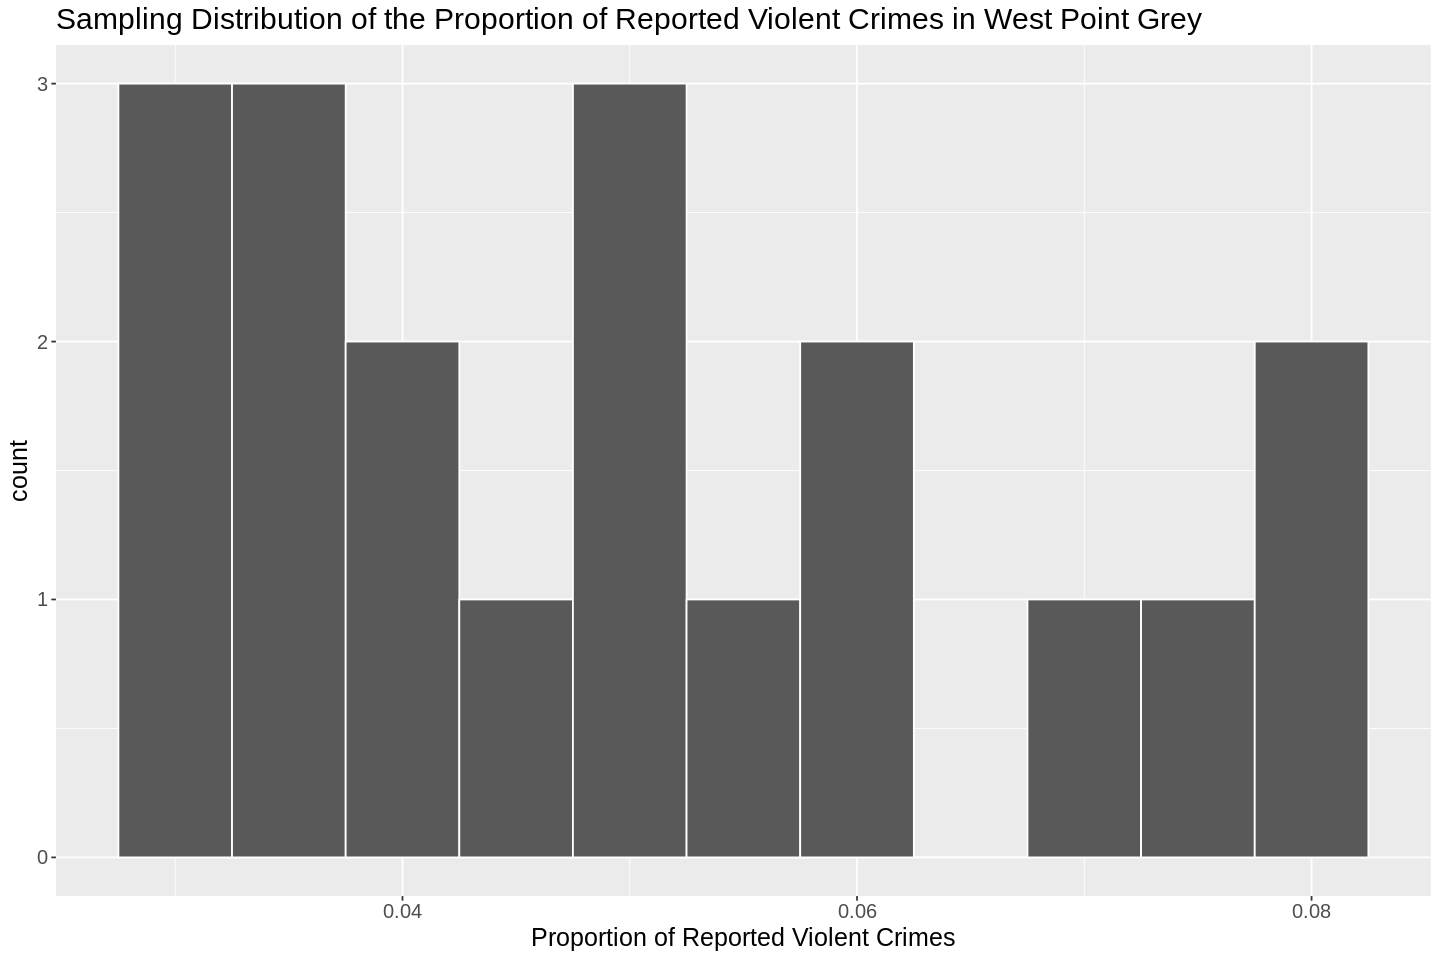

In [5]:
options(repr.plot.width = 12, repr.plot.height = 8)
Point_Grey_Prop

*Figure 1: Sampling Distribution of the Proportion of Reported Violent Crimes in West Point Grey*

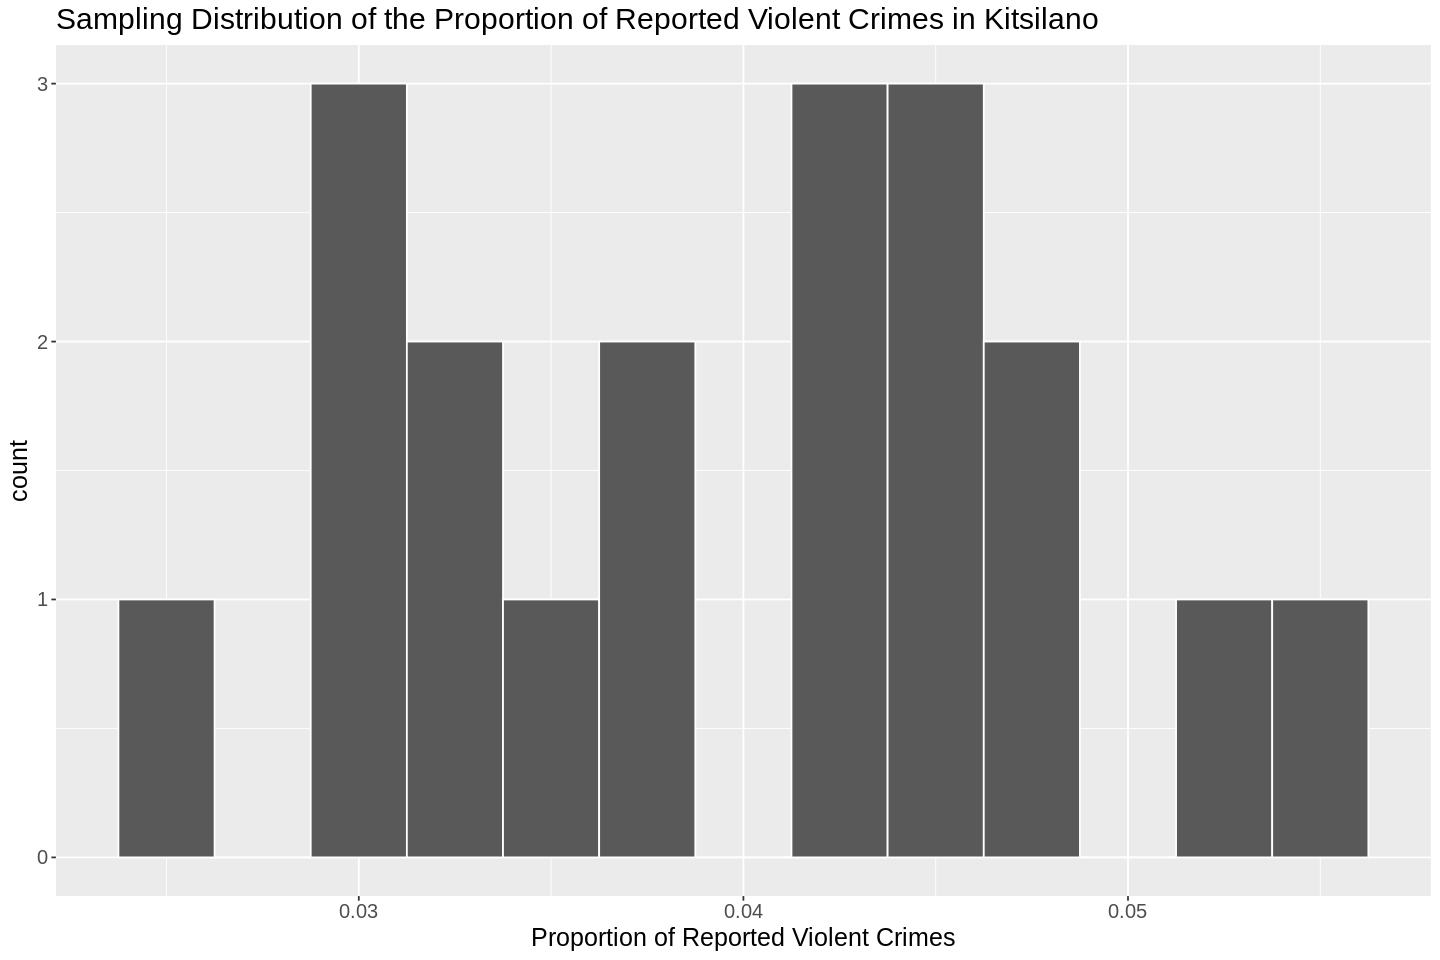

In [6]:
options(repr.plot.width = 12, repr.plot.height = 8)
Kitsilano_Prop

*Figure 2: Sampling Distribution of the Proportion of Reported Violent Crimes in Kitsilano*

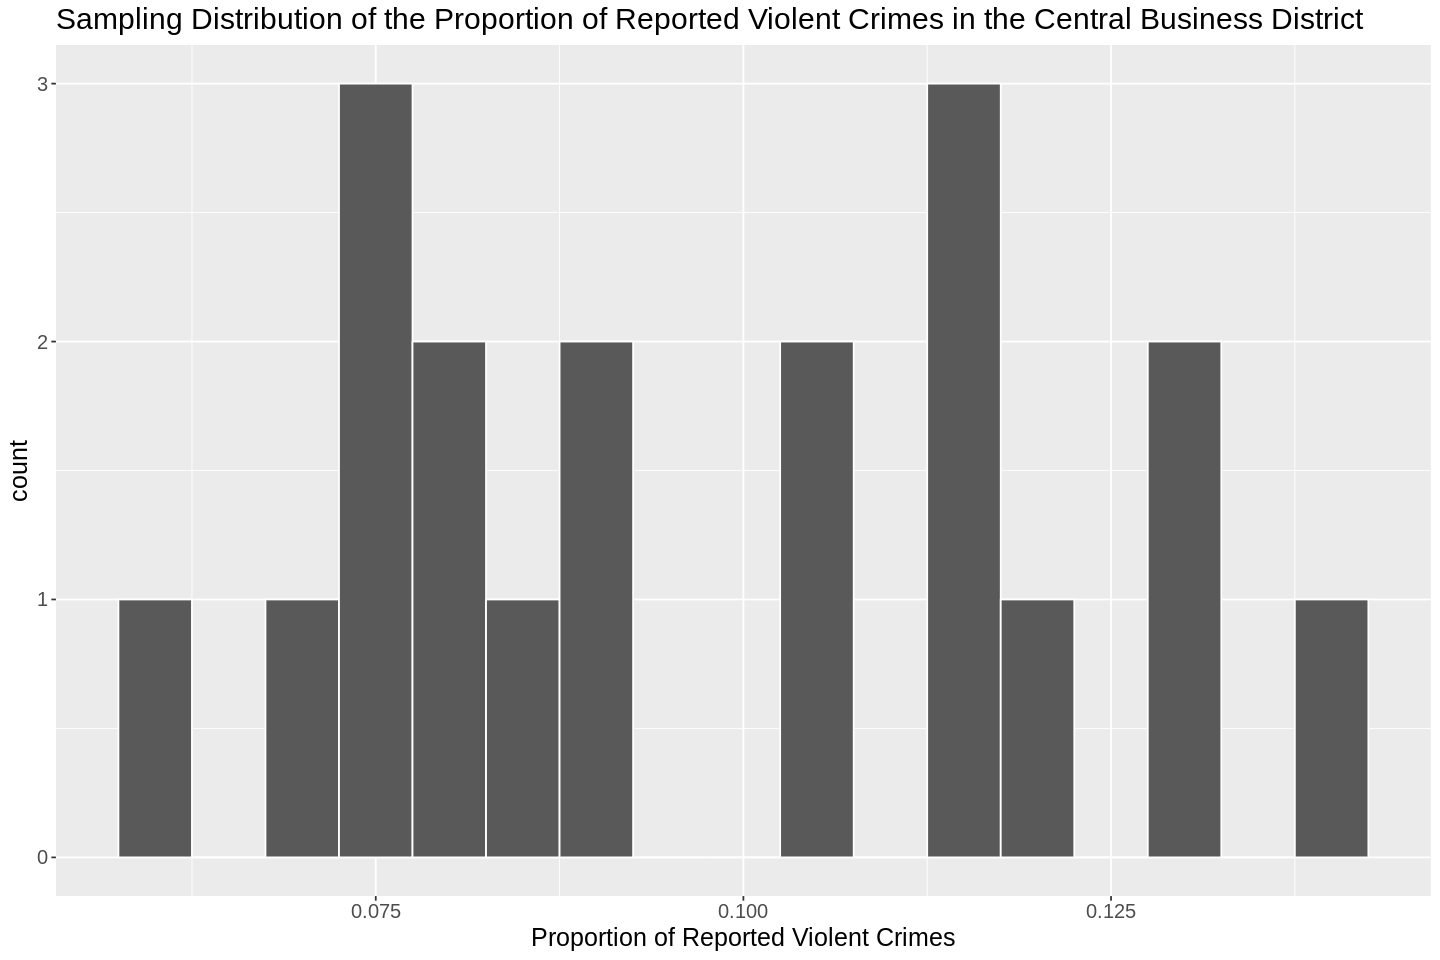

In [7]:
options(repr.plot.width = 12, repr.plot.height = 8)
CBD_Prop

*Figure 3: Sampling Distribution of the Proportion of Reported Violent Crimes in the Central Business District*

The following plot helps to directly compare the median proportion of violent crimes in different neighbourhoods.

In [8]:
# Calculate median proportion of violent crime for each neighbourhood
median_violent_crime_proportions <- crime_proportions %>%
                                    group_by(NEIGHBOURHOOD) %>%
                                    summarize(Median_Proportion = median(Violent_Crime_Proportion))

# Create a visualization
Crime_median_proportion_plot<- median_violent_crime_proportions %>%
                               ggplot(aes(x = reorder(NEIGHBOURHOOD, -Median_Proportion), y = Median_Proportion)) +
                               geom_bar(stat = 'identity') +
                               xlab("Neighourhood") +
                               ylab("Median Proportion of Violent Crimes per Year from 2003 - 2021") +
                               ggtitle("Comparison of the median proportion of violent crimes per year in Vancouver neighbourhoods between 2003 and 2021") +
                               theme(text = element_text(size=15)) +
                               coord_flip()

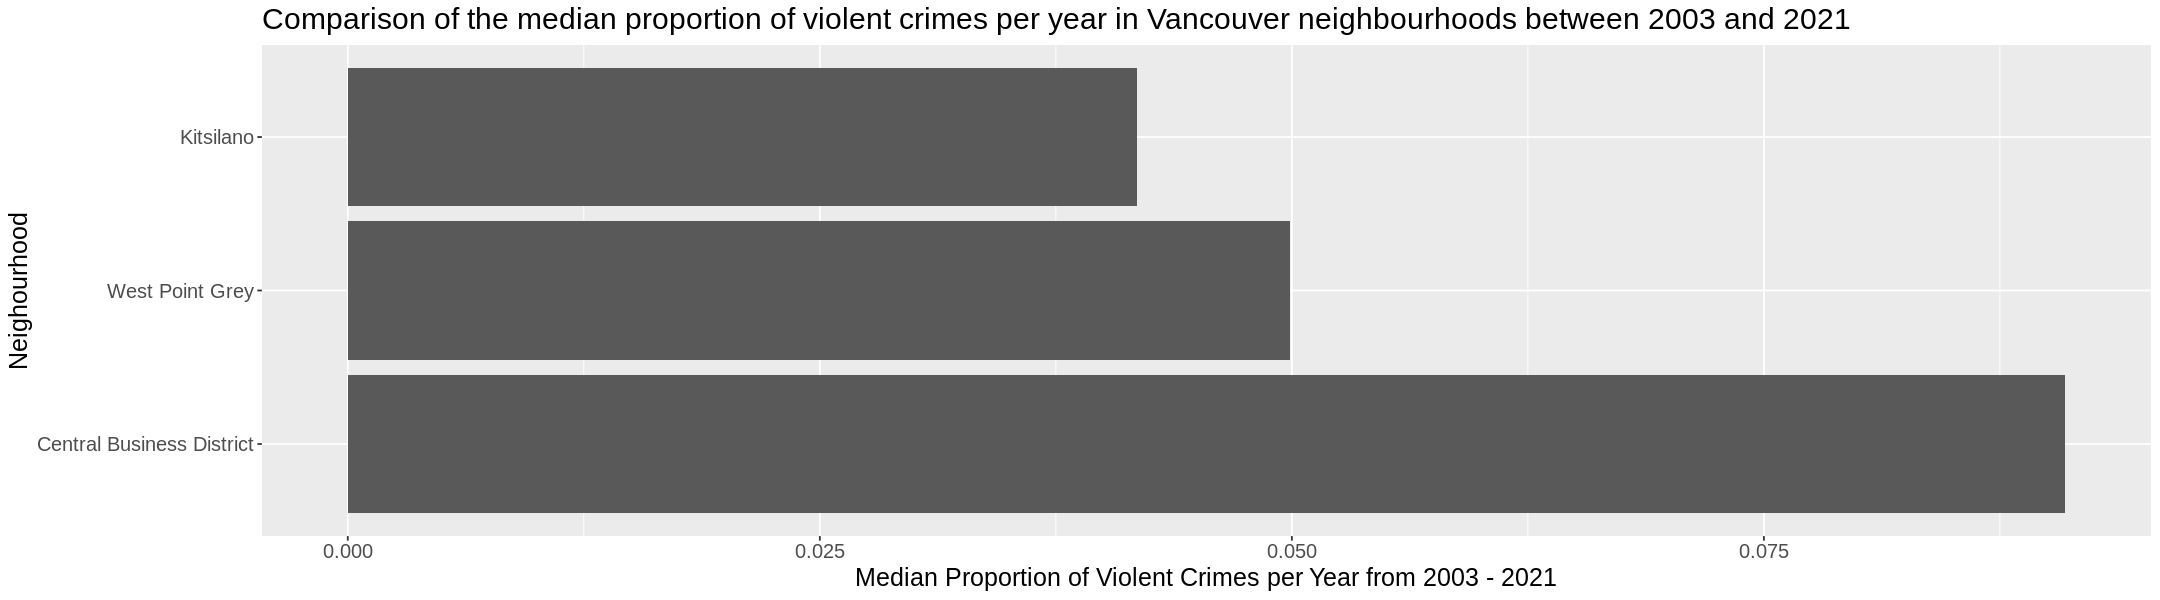

In [9]:
options(repr.plot.width = 18, repr.plot.height = 5)
Crime_median_proportion_plot

*Figure 4: Comparison of the median proportion of violent crimes per year in Vancouver neighbourhoods between 2003 and 2021*

Here is the median proportion of violent crimes in Point Grey, Kitsilano, and the Central Business District.

In [10]:
median_violent_crime_proportions

NEIGHBOURHOOD,Median_Proportion
<chr>,<dbl>
Central Business District,0.09094776
Kitsilano,0.04181390
West Point Grey,0.04988662


*Table 1: Median violent crime proportions per year in Point Grey, Kitsilano, and the Central Business District between 2003 and 2021*

### Yearly Mean of Violent Crimes in Each Neighbourhood 

The second parameter that we are going to calculate is the mean yearly amount of violent crimes across three Vancouver neighbourhoods, West Point Grey, Kitsilano, and the Central Business District.

In [11]:
# Sum amount of violent crimes for each neighbourhood for each year
violent_crime_sum <- violent_crime_years %>%
                     group_by(YEAR, NEIGHBOURHOOD) %>%
                     summarize(Violent_Crime_Incidents = sum(Violent == TRUE))

# Calculate mean of violent crimes per year in each neighbourhood
violent_crime_mean <- violent_crime_sum %>%
                      group_by(NEIGHBOURHOOD) %>%
                      summarize(Mean = mean(Violent_Crime_Incidents))

`summarise()` has grouped output by 'YEAR'. You can override using the `.groups` argument.



Similarly, we produce sampling distributions of mean proportion of violent crimes in Point Grey, Kitsilano, and the Central Business District.

In [12]:
# Create plots of sampling distributions

Point_Grey <- violent_crime_sum %>%
              filter(NEIGHBOURHOOD == "West Point Grey") %>%
              ggplot(aes(x = Violent_Crime_Incidents)) +
              geom_histogram(binwidth = 5, colour = "white") +
              xlab("Number Yearly of Reported Violent Crimes") +
              ggtitle("Sampling Distribution of Yearly Reported Violent Crimes in West Point Grey") + 
              theme(text = element_text(size=15))

Kitsilano <- violent_crime_sum %>%
             filter(NEIGHBOURHOOD == "Kitsilano") %>%
             ggplot(aes(x = Violent_Crime_Incidents)) +
             geom_histogram(binwidth = 5, colour = "white") +
             xlab("Number Yearly of Reported Violent Crimes") +
             ggtitle("Sampling Distribution of Yearly Reported Violent Crimes in Kitsilano") + 
             theme(text = element_text(size=15))

CBD <- violent_crime_sum %>%
       filter(NEIGHBOURHOOD == "Central Business District") %>%
       ggplot(aes(x = Violent_Crime_Incidents)) +
       geom_histogram(binwidth = 40, colour = "white") +
       xlab("Number Yearly of Reported Violent Crimes") +
       ggtitle("Sampling Distribution of Yearly Reported Violent Crimes in the Central Business District") + 
       theme(text = element_text(size=15))

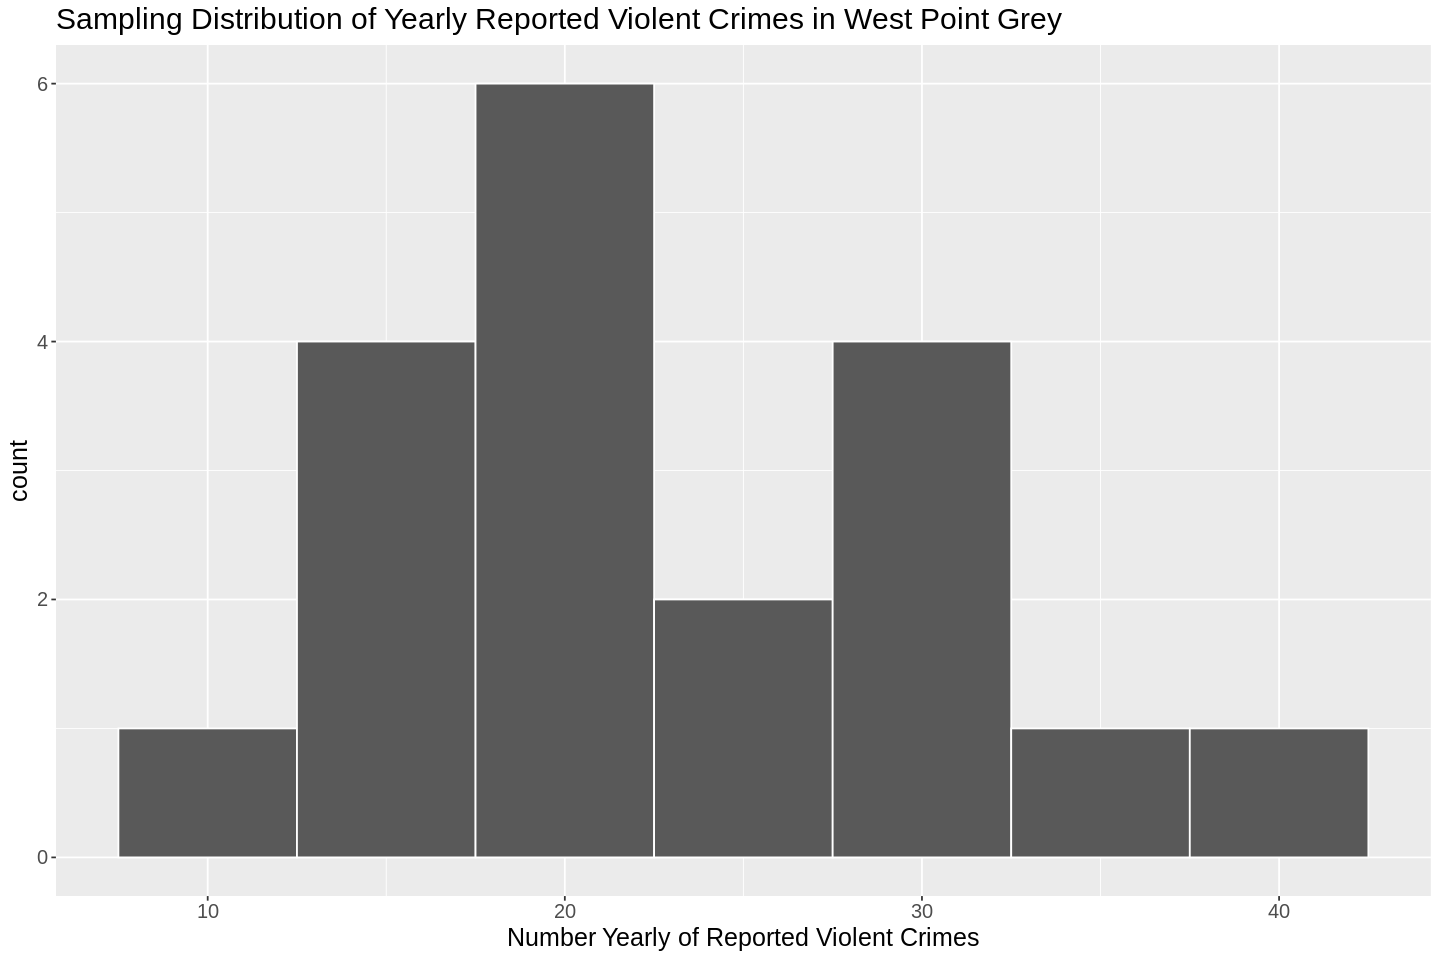

In [13]:
options(repr.plot.width = 12, repr.plot.height = 8)
Point_Grey

*Figure 5: Sampling Distribution of Yearly Reported Violent Crimes in Point Grey*

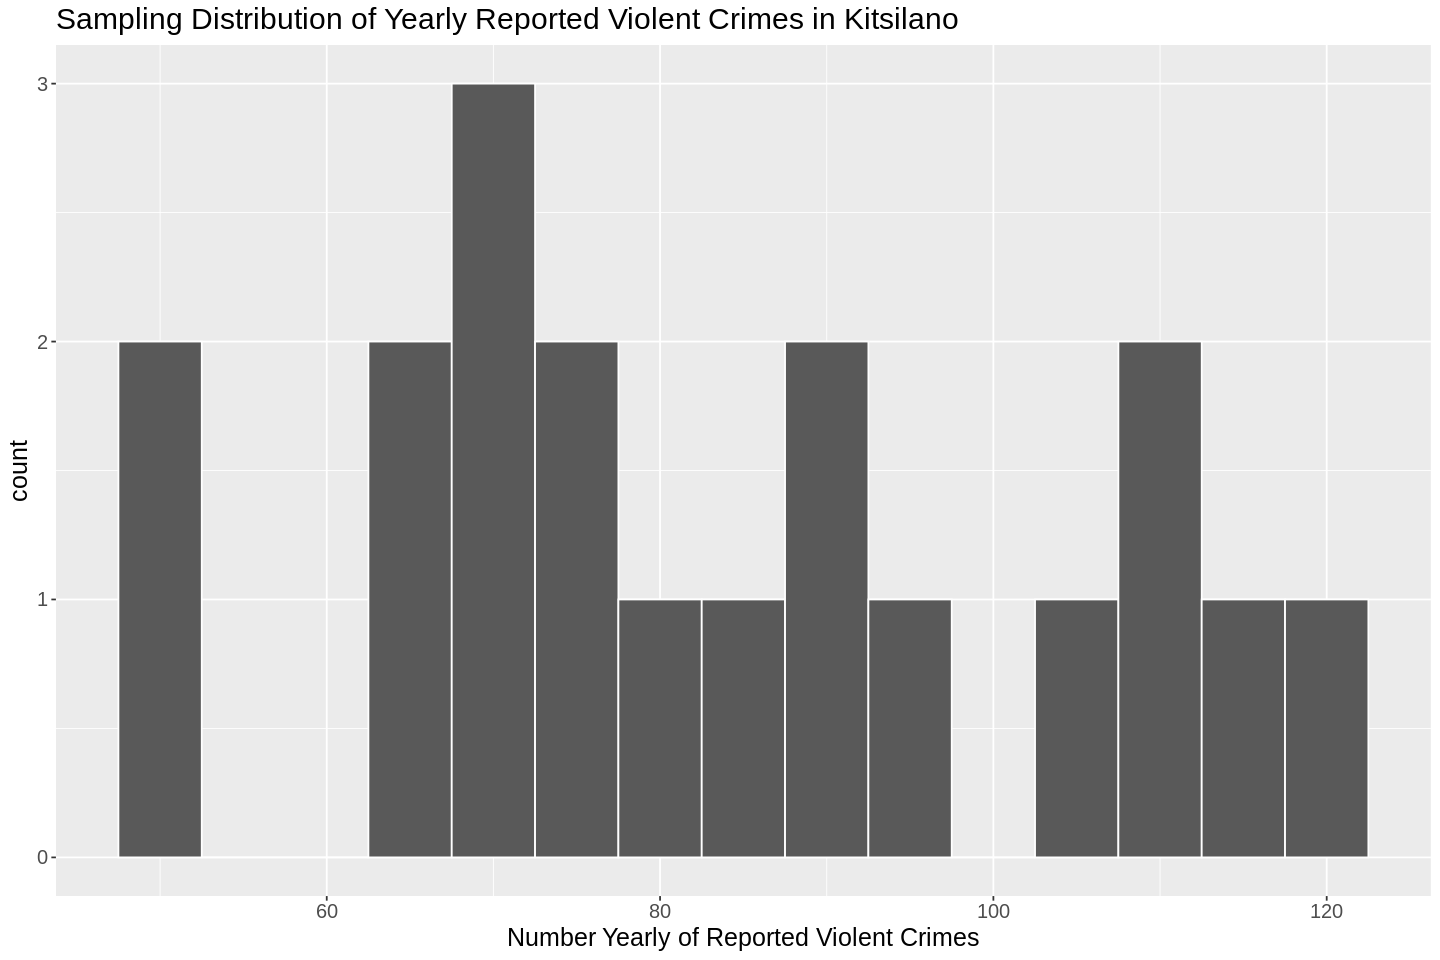

In [14]:
options(repr.plot.width = 12, repr.plot.height = 8)
Kitsilano

*Figure 6: Sampling Distribution of Yearly Reported Violent Crimes in Kitsilano*

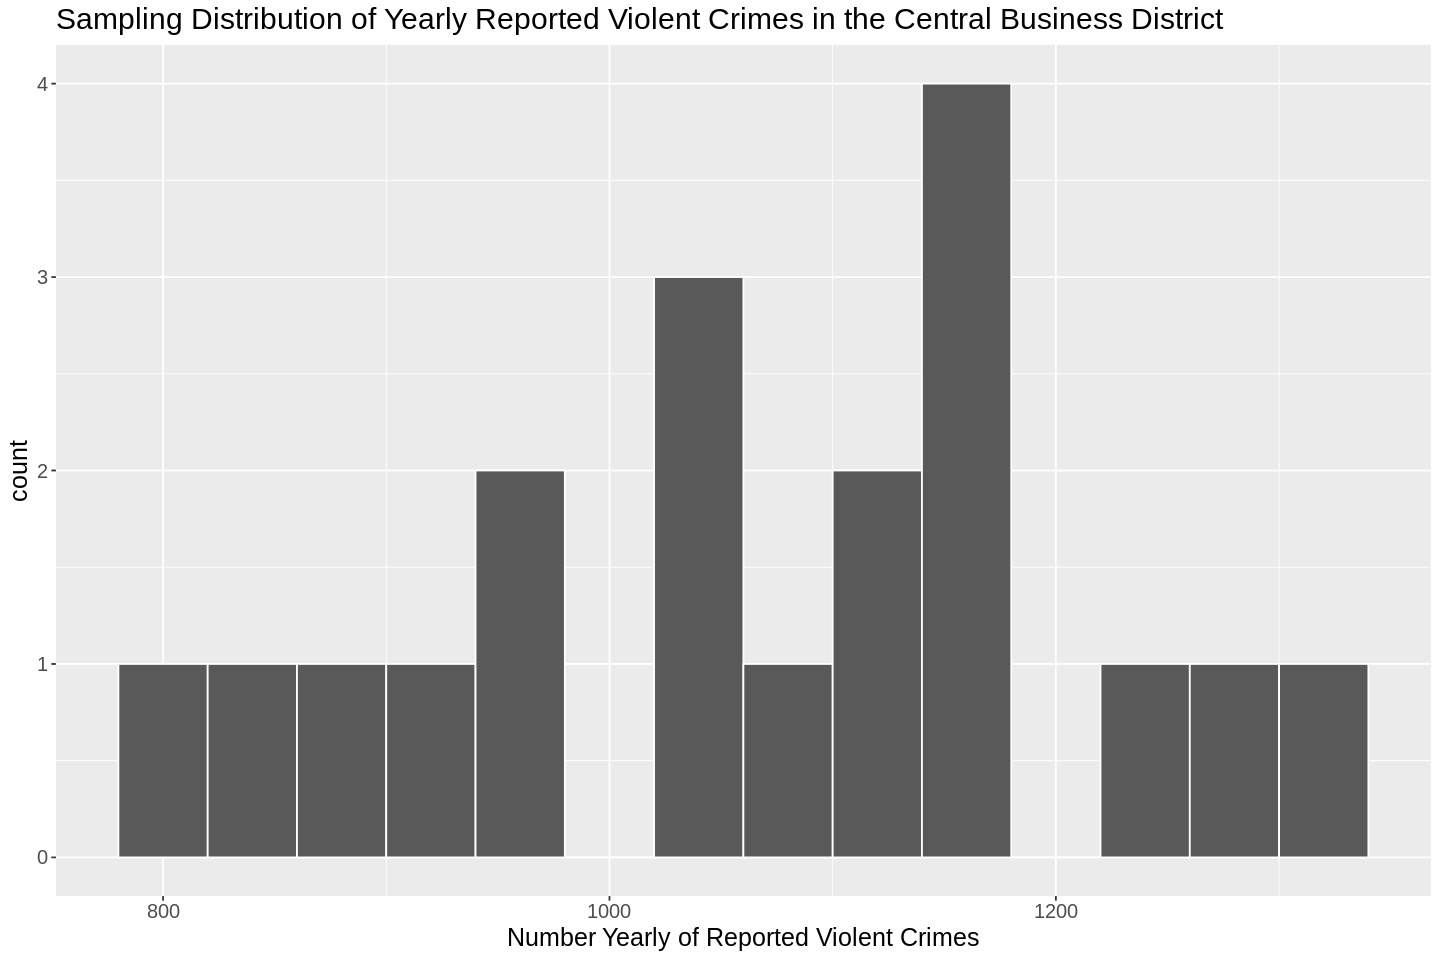

In [15]:
options(repr.plot.width = 12, repr.plot.height = 8)
CBD

*Figure 7: Sampling Distribution of Yearly Reported Violent Crimes in the Central Business District*

As what we did before, we create the plot to directly demonstrate the mean proportion of violent crimes in Point Grey, Kitsilano, and the Central Business District.

In [16]:
# Create a plot to demonstrate results
Crime_mean_plot<- violent_crime_mean %>%
                  ggplot(aes(x = reorder(NEIGHBOURHOOD, -Mean), y = Mean)) +
                  geom_bar(stat = 'identity') +
                  xlab("Neighourhood") +
                  ylab("Mean amount of violent crimes over 2003 - 2021") +
                  ggtitle("Comparison of the mean amount of violent crimes per year in Vancouver neighbourhoods between 2003 and 2021") +
                  theme(text = element_text(size=15)) +
                  coord_flip()

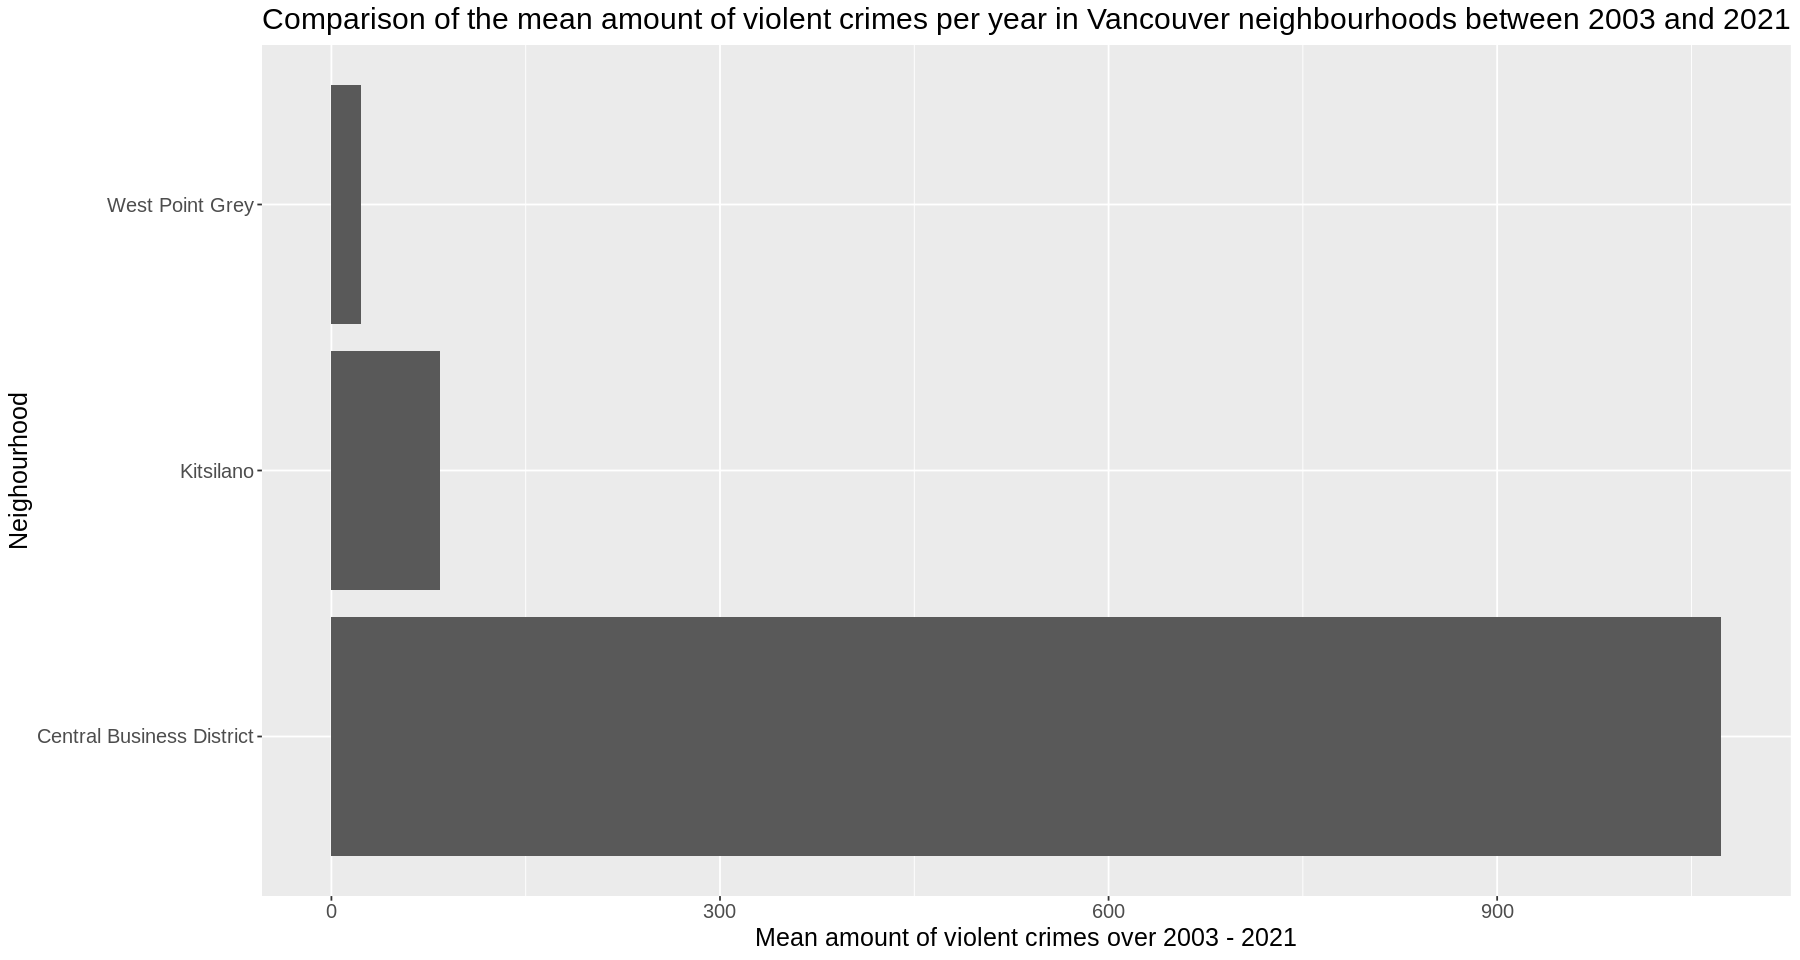

In [17]:
options(repr.plot.width = 15, repr.plot.height = 8)
Crime_mean_plot

*Figure 8: Comparison of the mean amount of violent crimes per year in Vancouver neighbourhoods between 2003 and 2021*

Here is the direct numeric approach to mean proportion of violent crimes in these three neighbourhoods in Vancouver.

In [18]:
violent_crime_mean

NEIGHBOURHOOD,Mean
<chr>,<dbl>
Central Business District,1073.10526
Kitsilano,83.89474
West Point Grey,23.21053


*Table 2: Mean amount of violent crimes per year in Point Grey, Kitsilano, and the Central Business District between 2003 and 2021*

## Methods

The current analysis of the data set demonstrates several strengths. To begin, the calculation of the parameters were done using a reproducible data science workflow, promoting the trustworthiness of the results of our analysis.

This dataset does not represent the entire population of crimes in Vancouver, as not all crimes committed are reported to police authorities. However, the dataset was collected in an unbiased manner, promoting further trust in our results. 

Since the dataset represents a sample of all crimes committed in Vancouver, we cannot confidently say that our results truly reflect the population. There may be some error in our analysis since we only examined a subset of the population, and therefore, we need to quantify the error that was introduced into the calculated parameters. 

To quantify the error that may be present within our analysis, we will calculate the following:

- 90% confidence interval of each parameter
- Hypothesis test that the further a community is from the Central Business District, the lower their mean yearly amount of violent crime incidents. West Point Grey is further than Kitsilano from the Central Business District, and from our initial results, has a lower yearly mean of violent crime.

From the preliminary data analysis, we expect to find that the further a neighbourhood is from the Central Business District, the lower the amount of violent crime it has. In identifying neighbourhoods with the greatest proportion of crimes, we can research what are common social determinants in Vancouver neighbourhoods that cause higher incidences of violent crime. The impacts of these findings can aid policy makers and community leaders in crafting interventions to reduce crime in these neighbourhoods, and create safer communities. 


## 90% Confidence Interval of Proportion Median

To begin, we do a bootstrapping for the proportion median of each of these neighborhoods.

In [19]:
set.seed(691)
Point_Grey_bootstrap <- crime_proportions %>%
                        filter(NEIGHBOURHOOD == "West Point Grey") %>%
                        ungroup() %>%
                        select(Violent_Crime_Proportion) %>%
                        rep_sample_n(reps = 1000, size = 19, replace = TRUE)
Kitsilano_bootstrap <- crime_proportions %>%
                       filter(NEIGHBOURHOOD == "Kitsilano") %>%
                       ungroup() %>%
                       select("Violent_Crime_Proportion") %>%
                       rep_sample_n(reps = 1000, size = 19, replace = TRUE)
CBD_bootstrap <- crime_proportions %>%
                 filter(NEIGHBOURHOOD == "Central Business District") %>%
                 ungroup() %>%
                 select("Violent_Crime_Proportion") %>%
                 rep_sample_n(reps = 1000, size = 19, replace = TRUE)

Next, the 5% and 95% quantiles of the proportion median of violent crimes in West Point Grey is computed to form the 90% confidence interval.

In [20]:
Point_Grey_sample_median <- Point_Grey_bootstrap %>%
                            group_by(replicate) %>%
                            summarize(prop_median = median(Violent_Crime_Proportion))

Point_Grey_upper_quantile <- Point_Grey_sample_median %>% 
                             pull(prop_median) %>% 
                             quantile(0.95)

Point_Grey_lower_quantile <- Point_Grey_sample_median %>% 
                             pull(prop_median) %>% 
                             quantile(0.05)
Point_Grey_median_CI_bootstrap <- Point_Grey_sample_median %>%
    summarize(ci_lower = quantile(prop_median, 0.05),
              ci_upper = quantile(prop_median, 0.95))

In [21]:
Point_Grey_median_CI_bootstrap

ci_lower,ci_upper
<dbl>,<dbl>
0.03950954,0.06108202


*Table 3: 90% confidence interval of the median of proportions of violent crime in West Point Grey, generated via simulation methods*

To visually represent this, the proportion median of violent crime in West Point Grey bootstrapped distribution along with the confidence intervals are plotted.

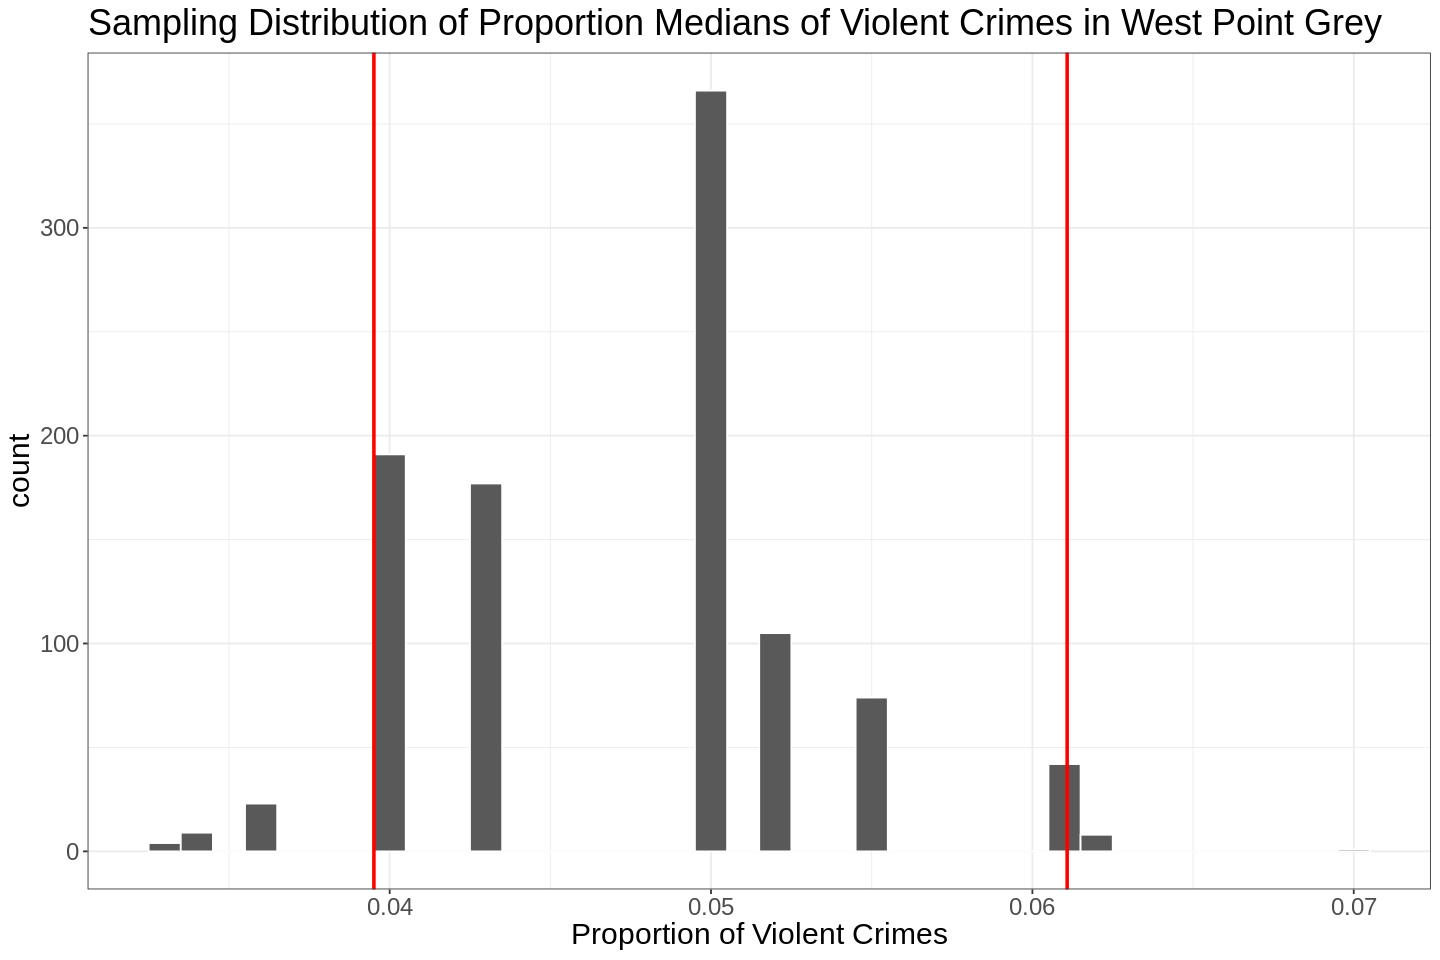

In [22]:
options(repr.plot.width = 12, repr.plot.height = 8)
Point_Grey_quantile_plot <- Point_Grey_sample_median %>% 
                            ggplot(aes(x = prop_median)) +
                            theme_bw() +
                            geom_histogram(binwidth = 0.001, color = 'white') +
                            geom_vline(xintercept = Point_Grey_lower_quantile, colour = "red", size = 1) +
                            geom_vline(xintercept = Point_Grey_upper_quantile, colour = "red", size = 1) +
                            labs(title = "Sampling Distribution of Proportion Medians of Violent Crimes in West Point Grey",
                            x = "Proportion of Violent Crimes") +
                            theme(text = element_text(size = 18))
Point_Grey_quantile_plot

*Figure 9: Sampling distribution via simulation of the median proportion of violent crime in West Point Grey, with 90% confidence intervals*

We can determine from this analysis that if picking a random sample, the median proportion of violent crimes in West Point Grey has a 90% probability to fall between 3.95% to 6.12%.

Subsequently, the 5% and 95% quantiles of the proportion median of violent crimes in Kitsilano is computed to form the 90% confidence interval.

In [23]:
Kitsilano_sample_median <- Kitsilano_bootstrap %>%
                           group_by(replicate) %>%
                           summarize(prop_median = median(Violent_Crime_Proportion))

Kitsilano_upper_quantile <- Kitsilano_sample_median %>% 
                            pull(prop_median) %>% 
                            quantile(0.95)

Kitsilano_lower_quantile <- Kitsilano_sample_median %>% 
                            pull(prop_median) %>% 
                            quantile(0.05)

Kitsilano_median_CI_bootstrap <- Kitsilano_sample_median %>%
    summarize(ci_lower = quantile(prop_median, 0.05),
              ci_upper = quantile(prop_median, 0.95))

In [24]:
Kitsilano_median_CI_bootstrap

ci_lower,ci_upper
<dbl>,<dbl>
0.0351835,0.04565323


*Table 4: 90% confidence interval of the median of proportions of violent crime in Kitsilano, generated via simulation methods*

We then plot the bootstrap distribution of the median proportion of violent crimes in Kitsilano with the confidence intervals.

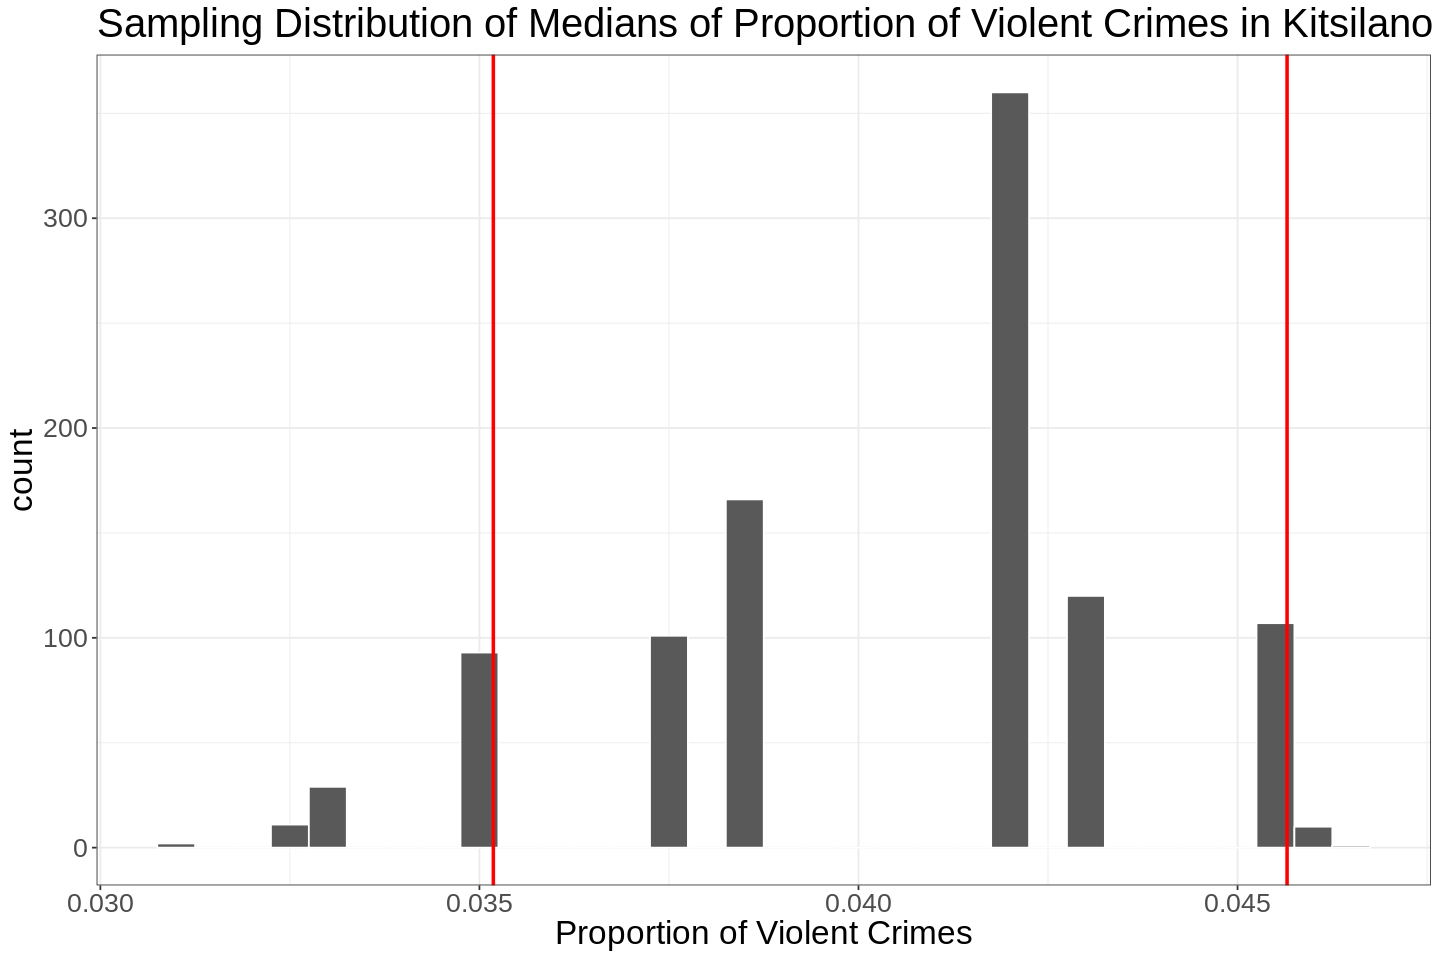

In [25]:
options(repr.plot.width = 12, repr.plot.height = 8)
Kitsilano_quantile_plot <- Kitsilano_sample_median %>% 
                           ggplot(aes(x = prop_median)) +
                           theme_bw() +
                           geom_histogram(binwidth = 0.0005, color = 'white') +
                           geom_vline(xintercept = Kitsilano_lower_quantile, colour = "red", size = 1) +
                           geom_vline(xintercept = Kitsilano_upper_quantile, colour = "red", size = 1) +
                           labs(title = "Sampling Distribution of Medians of Proportion of Violent Crimes in Kitsilano",
                           x = "Proportion of Violent Crimes") +
                           theme(text = element_text(size = 20))
Kitsilano_quantile_plot

*Figure 10: Sampling distribution via simulation of the median proportion of violent crime in Kitsilano, with 90% confidence intervals*

We can determine from this analysis that if picking a random sample, the median proportion of violent crimes in Kitsilano has a 90% probability to fall between 3.51% to 4.57%.

Finally,  the 5% and 95% quantiles of the proportion median of violent crimes in the Greater Business District is computed to form the 90% confidence interval.

In [26]:
CBD_sample_median <- CBD_bootstrap %>%
                     group_by(replicate) %>%
                     summarize(prop_median = median(Violent_Crime_Proportion))

CBD_upper_quantile <- CBD_sample_median %>% 
                      pull(prop_median) %>% 
                      quantile(0.95)

CBD_lower_quantile <- CBD_sample_median %>% 
                      pull(prop_median) %>% 
                      quantile(0.05)

CBD_median_CI_bootstrap <- CBD_sample_median %>%
    summarize(ci_lower = quantile(prop_median, 0.05),
              ci_upper = quantile(prop_median, 0.95))

In [27]:
CBD_median_CI_bootstrap

ci_lower,ci_upper
<dbl>,<dbl>
0.08105584,0.1138336


*Table 5: 90% confidence interval of the median of proportions of violent crime in the Central Business District, generated via simulation methods*

The bootstrapped sampling distribution of the median of proportion of violent crimes with the 90% confidence interval in the Central Business District is then plotted.

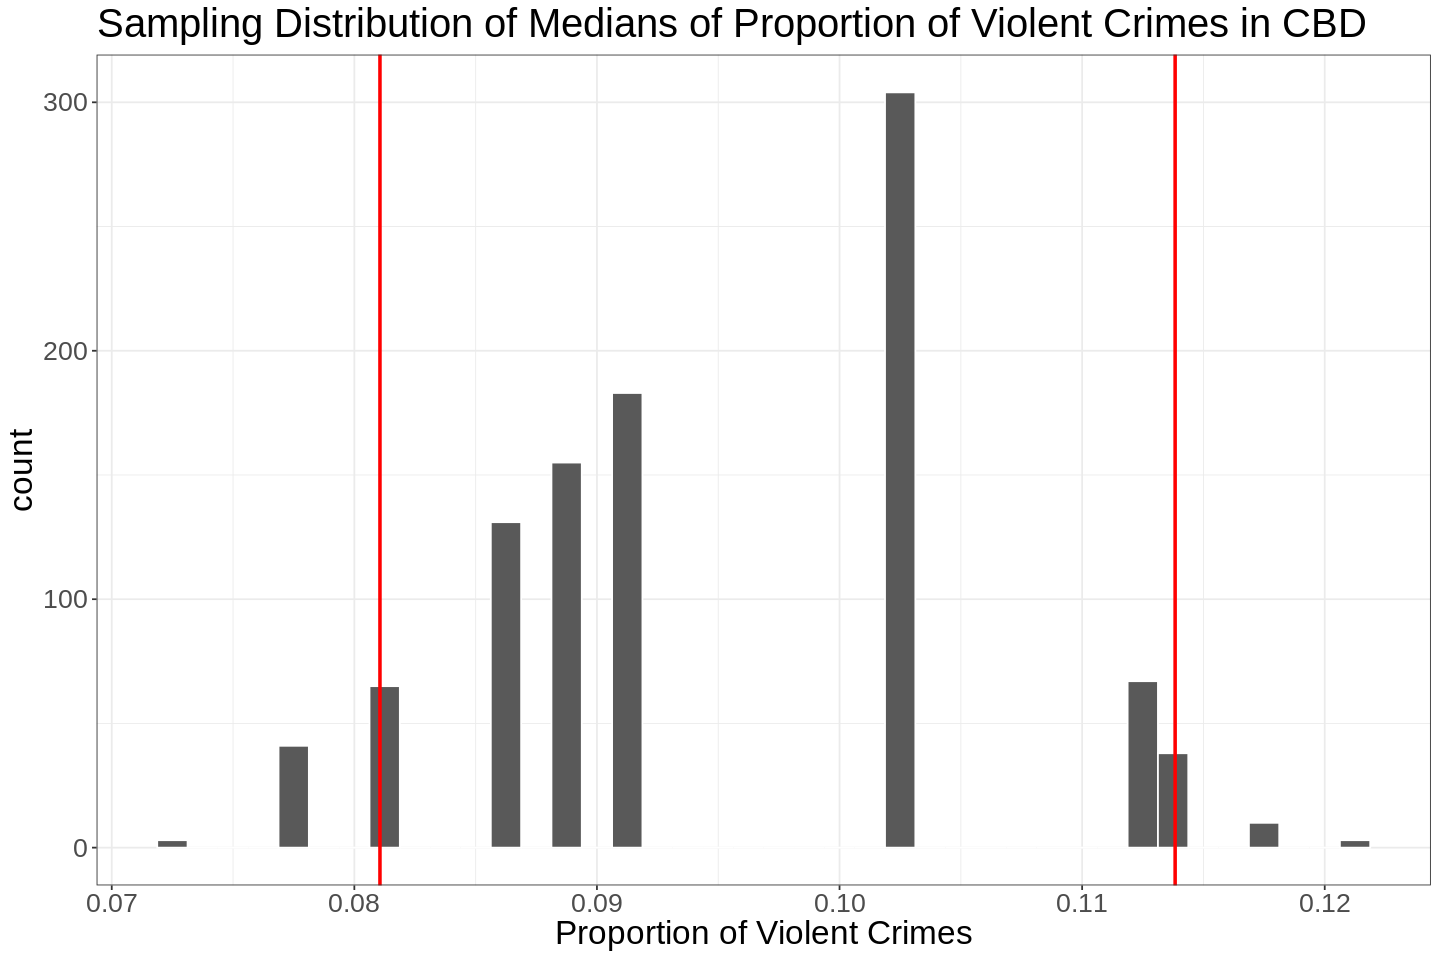

In [28]:
options(repr.plot.width = 12, repr.plot.height = 8)
CBD_quantile_plot <- CBD_sample_median %>% 
                     ggplot(aes(x = prop_median)) +
                     theme_bw() +
                     geom_histogram(binwidth = 0.00125, color = 'white') +
                     geom_vline(xintercept = CBD_lower_quantile, colour = "red", size = 1) +
                     geom_vline(xintercept = CBD_upper_quantile, colour = "red", size = 1) +
                     labs(title = "Sampling Distribution of Medians of Proportion of Violent Crimes in CBD",
                     x = "Proportion of Violent Crimes") +
                     theme(text = element_text(size = 20))
CBD_quantile_plot

*Figure 11: Sampling distribution via simulation of the median proportion of violent crime in the Central Business District, with 90% confidence intervals*

We can determine from this analysis that if picking a random sample, the median proportion of violent crimes in the Central Business District has a 90% probability to fall between 8.11% to 11.38%.

However, there are lots of gaps between these proportion values which makes the confidence interval hard to apply in practice. Moreover, the result can be very random due to the small size of each of the sample. 

## 90% Confidence Interval of Mean

Similarly, we calculate the 90% confidence interval of violent crimes mean.

To begin, the sampling distribution of the mean yearly violent crime incidents each neighbourhood is bootstrapped.

In [29]:
set.seed(8622)
Point_Grey_mean_bootstrap <- violent_crime_sum %>%
                             filter(NEIGHBOURHOOD == "West Point Grey") %>%
                             ungroup() %>%
                             select(Violent_Crime_Incidents) %>%
                             rep_sample_n(size = 19, reps = 1000, replace = TRUE)
Kitsilano_mean_bootstrap <-  violent_crime_sum %>%
                             filter(NEIGHBOURHOOD == "Kitsilano") %>%
                             ungroup() %>%
                             select(Violent_Crime_Incidents) %>%
                             rep_sample_n(size = 19, reps = 1000, replace = TRUE) 
    
CBD_mean_bootstrap <- violent_crime_sum %>%
                      filter(NEIGHBOURHOOD == "Central Business District") %>%
                      ungroup() %>%
                      select(Violent_Crime_Incidents) %>%
                      rep_sample_n(size = 19, reps = 1000, replace = TRUE)

Next, the 90% confidence interval for the mean violent crime occurrences in West Point Grey is computed by computing the 5% and 95% quantiles. 

In [30]:
Point_Grey_sample_mean <- Point_Grey_mean_bootstrap %>%
                          group_by(replicate) %>%
                          summarize(mean = mean(Violent_Crime_Incidents))
Point_Grey_upper_mean <- Point_Grey_sample_mean %>% 
                         pull(mean) %>% 
                         quantile(0.95)
Point_Grey_lower_mean <- Point_Grey_sample_mean %>% 
                         pull(mean) %>% 
                         quantile(0.05)
Point_Grey_mean_CI_bootstrap <- Point_Grey_sample_mean %>%
    summarize(ci_lower = quantile(mean, 0.05),
              ci_upper = quantile(mean, 0.95))

In [31]:
Point_Grey_mean_CI_bootstrap

ci_lower,ci_upper
<dbl>,<dbl>
20.36842,26.00263


*Table 6: 90% confidence interval of the annual mean of violent crimes in West Point Grey, generated via simulation methods*

A plot of the bootstrap distribution and 90 percent confidence interval is then created for West Point Grey.

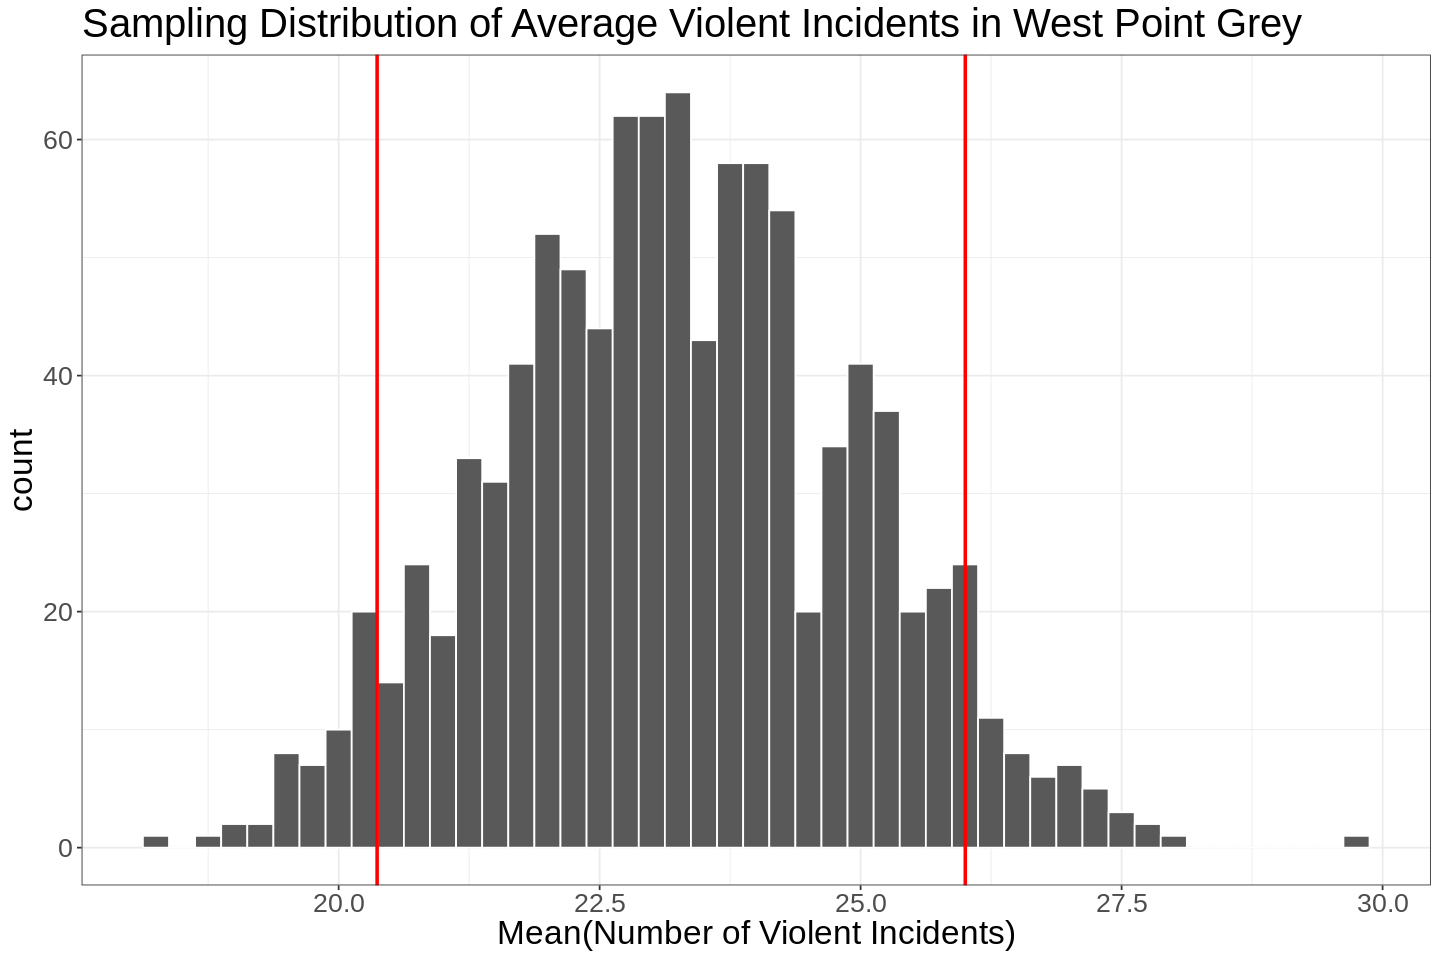

In [32]:
options(repr.plot.width = 12, repr.plot.height = 8)
Point_Grey_mean_quantile_plot <- Point_Grey_sample_mean %>% 
                                 ggplot(aes(x = mean)) +
                                 theme_bw() +
                                 geom_histogram(binwidth = 0.25, color = 'white') +
                                 geom_vline(xintercept = Point_Grey_lower_mean, colour = "red", size = 1) +
                                 geom_vline(xintercept = Point_Grey_upper_mean, colour = "red", size = 1) +
                                 labs(title = "Sampling Distribution of Average Violent Incidents in West Point Grey",
                                 x = "Mean(Number of Violent Incidents)") +
                                 theme(text = element_text(size = 20))
Point_Grey_mean_quantile_plot

*Figure 12: Sampling distribution via simulation of the mean number of violent crimes in West Point Grey, with 90% confidence intervals*

We can deduce that if picking a random sample, the mean of violent incidents has a 90% probability to fall between 20.4 to 26.0 in West Point Grey.

We then compute the 90% confidence interval for the mean violent crime occurrences in Kitsilano by determining the 5% and 95% quantiles. 

In [33]:
Kitsilano_sample_mean <- Kitsilano_mean_bootstrap %>%
                         group_by(replicate) %>%
                         summarize(mean = mean(Violent_Crime_Incidents))

Kitsilano_upper_mean <- Kitsilano_sample_mean %>% 
                        pull(mean) %>% 
                        quantile(0.95)
Kitsilano_lower_mean <- Kitsilano_sample_mean %>% 
                        pull(mean) %>% 
                        quantile(0.05)
Kitsilano_mean_CI_bootstrap <- Kitsilano_sample_mean %>%
    summarize(ci_lower = quantile(mean, 0.05),
              ci_upper = quantile(mean, 0.95))

In [34]:
Kitsilano_mean_CI_bootstrap

ci_lower,ci_upper
<dbl>,<dbl>
75.62632,91.78947


*Table 7: 90% confidence interval of the annual mean of violent crimes in Kitsilano, generated via simulation methods*

A plot of the bootstrap distribution and 90 percent confidence interval is then created for Kitsilano.

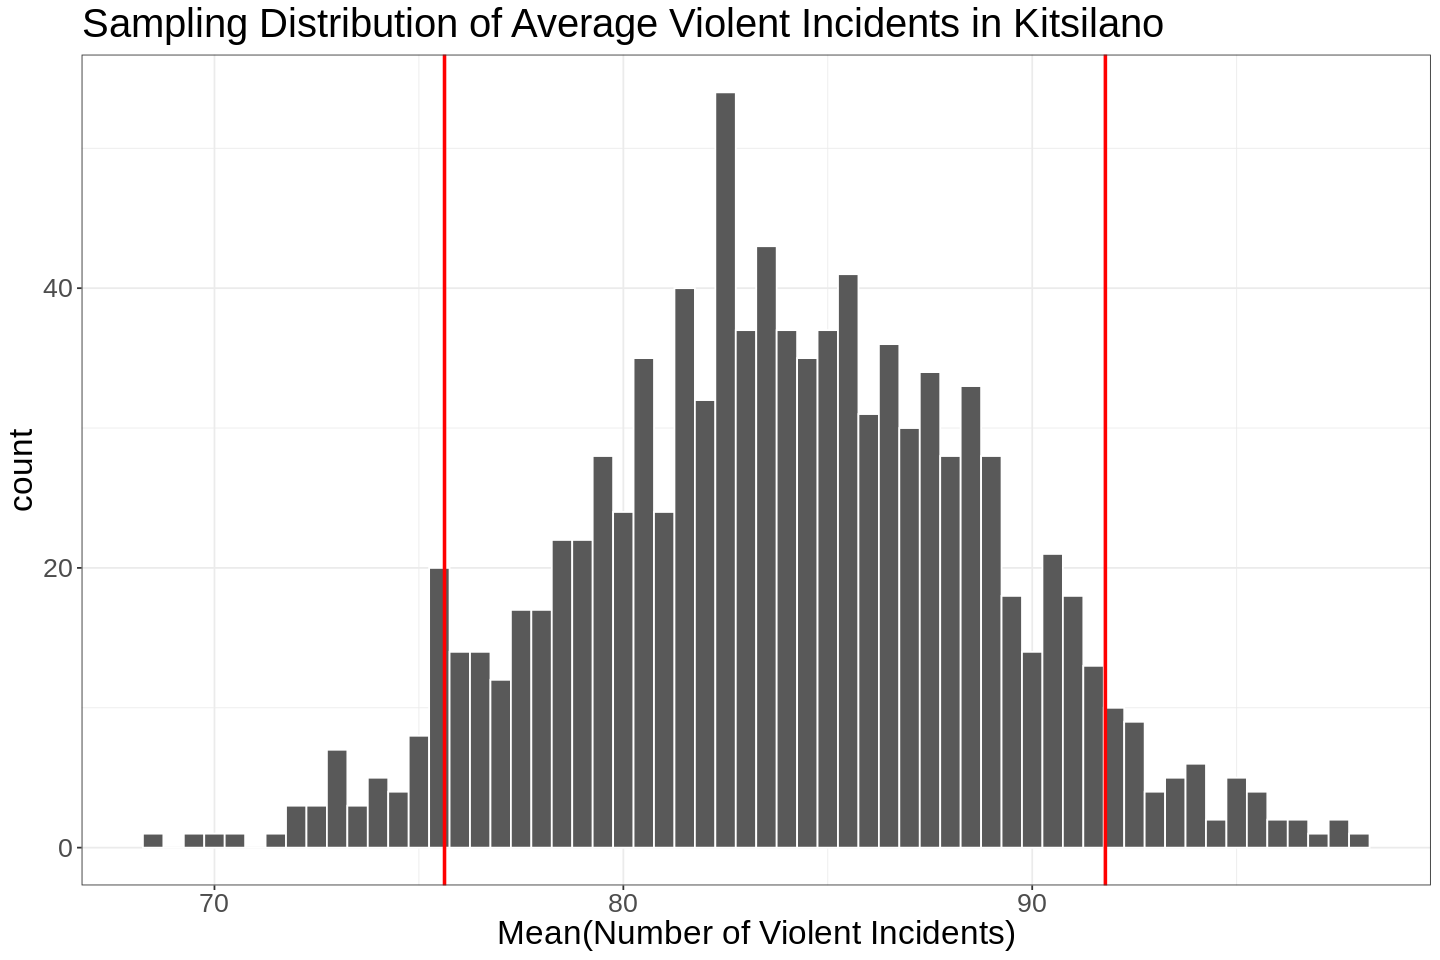

In [35]:
options(repr.plot.width = 12, repr.plot.height = 8)
Kitsilano_mean_quantile_plot <- Kitsilano_sample_mean %>% 
                                ggplot(aes(x = mean)) +
                                theme_bw() +
                                geom_histogram(binwidth = 0.5, color = 'white') +
                                geom_vline(xintercept = Kitsilano_lower_mean, colour = "red", size = 1) +
                                geom_vline(xintercept = Kitsilano_upper_mean, colour = "red", size = 1) +
                                labs(title = "Sampling Distribution of Average Violent Incidents in Kitsilano",
                                x = "Mean(Number of Violent Incidents)") +
                                theme(text = element_text(size = 20))
Kitsilano_mean_quantile_plot

*Figure 13: Sampling distribution via simulation of the mean number of violent crimes in Kitsilano, with 90% confidence intervals*

We can also deduce that if picking a random bootstrap sample from Kitsilano data set, the mean of violent incidents has a 90% probability to roughly fall between 75.6 to 91.8 in Kitsilano. Comparing to West Point Grey, the interval increases a lot showing that more violent incidents take place in Kitsilano.

Finally, the 90% confidence interval for the mean violent crime occurrences in the Central Business District is computed by determining the 5% and 95% quantiles

In [36]:
CBD_sample_mean <- CBD_mean_bootstrap %>%
                   group_by(replicate) %>%
                   summarize(mean = mean(Violent_Crime_Incidents))

CBD_upper_mean <- CBD_sample_mean %>% 
                  pull(mean) %>% 
                  quantile(0.95)
CBD_lower_mean <- CBD_sample_mean %>% 
                  pull(mean) %>% 
                  quantile(0.05)
CBD_mean_CI_bootstrap <- CBD_sample_mean %>%
    summarize(ci_lower = quantile(mean, 0.05),
              ci_upper = quantile(mean, 0.95))

In [37]:
CBD_mean_CI_bootstrap

ci_lower,ci_upper
<dbl>,<dbl>
1017.574,1126.158


*Table 8: 90% confidence interval of the annual mean of violent crimes in the Central Business District, generated via simulation methods*

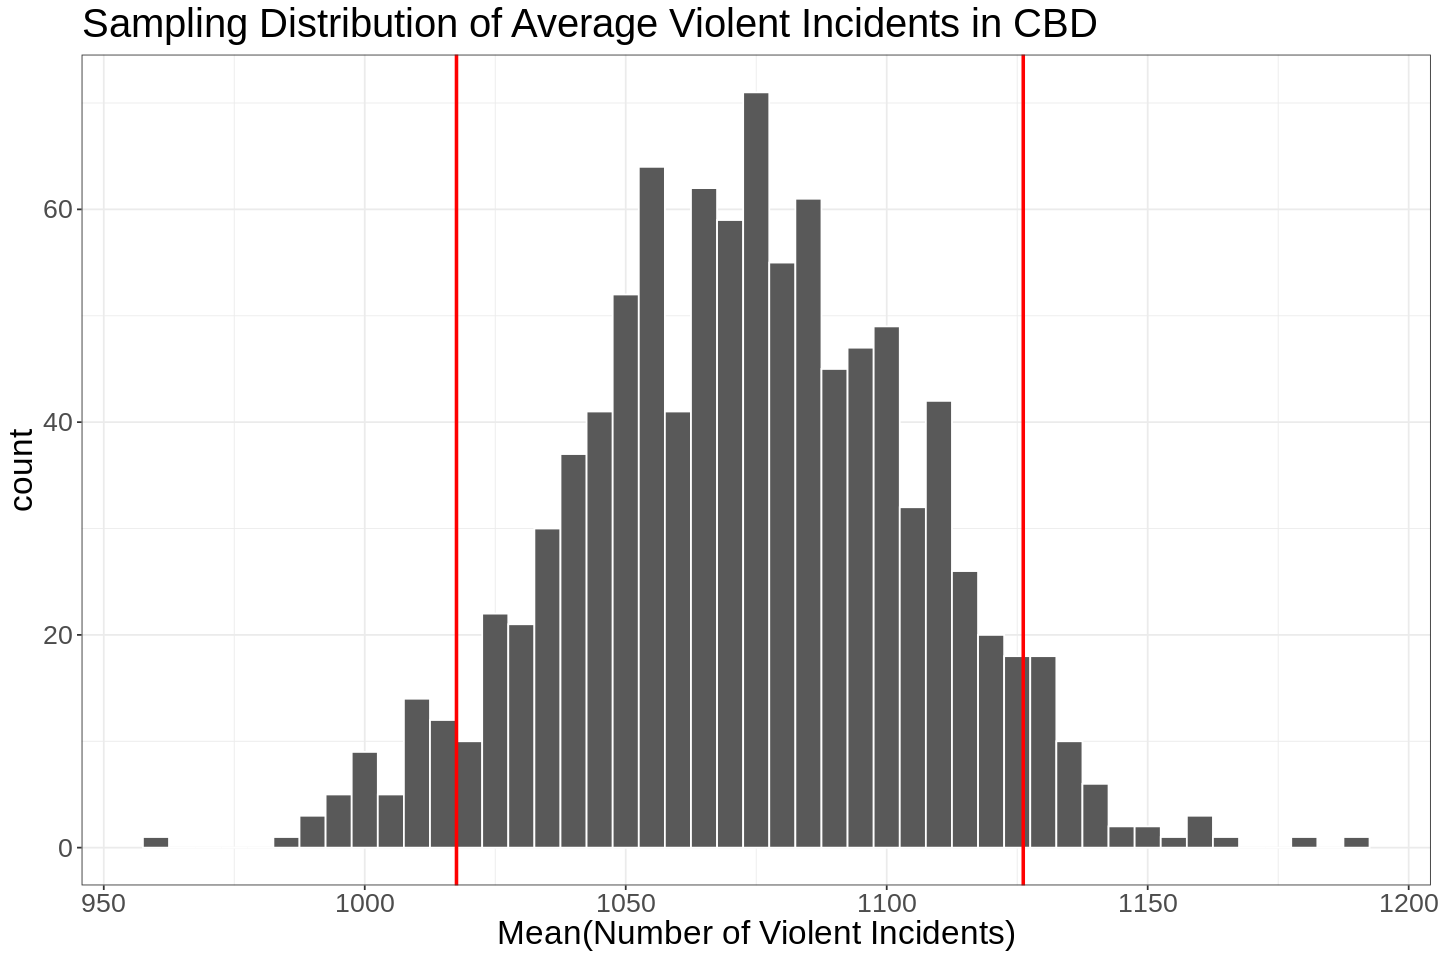

In [38]:
options(repr.plot.width = 12, repr.plot.height = 8)
CBD_mean_quantile_plot <- CBD_sample_mean %>% 
                          ggplot(aes(x = mean)) +
                          theme_bw() +
                          geom_histogram(binwidth = 5, color = 'white') +
                          geom_vline(xintercept = CBD_lower_mean, colour = "red", size = 1) +
                          geom_vline(xintercept
                                     = CBD_upper_mean, colour = "red", size = 1) +
                          labs(title = "Sampling Distribution of Average Violent Incidents in CBD",
                          x = "Mean(Number of Violent Incidents)") +
                          theme(text = element_text(size = 20))
CBD_mean_quantile_plot

*Figure 14: Sampling distribution via simulation of the mean number of violent crimes in the Central Business District, with 90% confidence intervals*

From the plot above, we can also deduce that if picking a random bootstrap sample from Central Business District data set, the mean of violent incidents has a 90% probability to fall between 1017.6 to 1126.2 in the Central Business District. Comparing to West Point Grey and Kitsilano, this interval shows a dramatic increases indicating that more violent incidents take place in Central Business District.

As we discussed above, the proportion of violent crimes in Central Business District is also the largest. This provides further confidence that the number of violent crimes in Central Business District is significantly larger than in Kitsilano, and West Point Grey has the least number of violent crimes relative to Kitsilano and the Central Business District.

## Asymptotic Methods for Proportion Median

We can also use asymptotics to calculate the 90% confidence intervals. The Central Limit Theorem will be applied to the sample, and the 90% Confidence Interval for the proportion medians and the relevant plots containing the interval are generated. An ideal sampling distribution would be a Normal distribution from the Central Limit Theorem. We will apply this method on the data of the same neighborhood, which are West Point Grey, Kitsilano, and CBD.

First, the 5% and 95% quantiles of the proportion median is computed for the neighbourhood West Point Grey.

In [39]:
# Use CLT to estimate a 90% CI of proportion median in Point Grey
Point_Grey_CLT <- crime_proportions %>%
                        filter(NEIGHBOURHOOD == "West Point Grey") %>%
                        ungroup()
Point_Grey_median <- median(Point_Grey_CLT$Violent_Crime_Proportion)
Point_Grey_se <- sd(Point_Grey_CLT$Violent_Crime_Proportion)/sqrt(length(Point_Grey_CLT$Violent_Crime_Proportion))
Point_Grey_median_ci <- tibble(
    lower_ci = qnorm(0.05, Point_Grey_median, Point_Grey_se),
    upper_ci = qnorm(0.95, Point_Grey_median, Point_Grey_se)
)
Point_Grey_median_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.04333013,0.05644312


*Table 9: 90% confidence interval of the median of proportions of violent crime in West Point Grey, generated via asymptotics methods*

The confidence interval is plotted along with the sample distribution of the median proportion of violent crimes in West Point Grey.

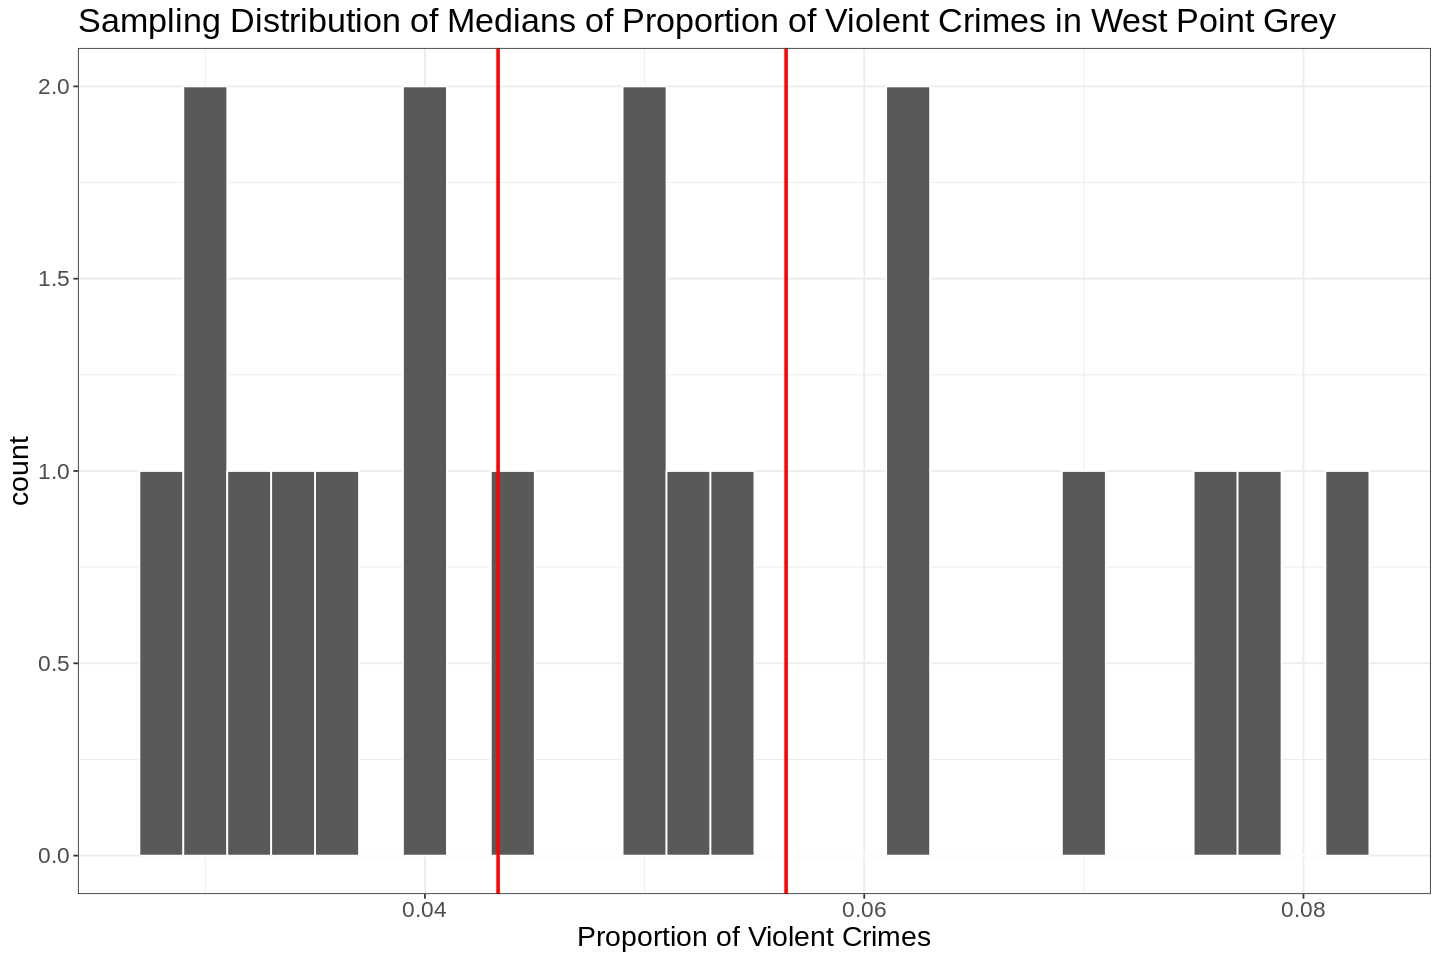

In [40]:
Point_Grey_upper_CLT <- as.numeric(Point_Grey_median_ci$upper_ci)
Point_Grey_lower_CLT <- as.numeric(Point_Grey_median_ci$lower_ci)

options(repr.plot.width = 12, repr.plot.height = 8)
Point_Grey_CLT_plot <- Point_Grey_CLT %>% 
                            ggplot(aes(x = Violent_Crime_Proportion)) +
                            theme_bw() +
                            geom_histogram(binwidth = 0.002, color = 'white')+
                            geom_vline(xintercept = Point_Grey_upper_CLT, colour = "red", size = 1) +
                            geom_vline(xintercept = Point_Grey_lower_CLT, colour = "red", size = 1) +
                            labs(title = "Sampling Distribution of Medians of Proportion of Violent Crimes in West Point Grey",
                            x = "Proportion of Violent Crimes") +
                            theme(text = element_text(size = 17))
Point_Grey_CLT_plot

*Figure 15: Sampling distribution via asymptotics of the median proportion of violent crime in West Point Grey, with 90% confidence intervals*

The 5% and 95% quantiles of the median of proportions of violent crimes in Kitsilano is computed, assuming that the sample distribution follows the central limit theorem.

In [41]:
# Use CLT to estimate a 90% CI of proportion median in Kitsilano
Kitsilano_CLT <- crime_proportions %>%
                        filter(NEIGHBOURHOOD == "Kitsilano") %>%
                        ungroup()
Kitsilano_median <- median(Kitsilano_CLT$Violent_Crime_Proportion)
Kitsilano_se <- sd(Kitsilano_CLT$Violent_Crime_Proportion)/sqrt(length(Kitsilano_CLT$Violent_Crime_Proportion))
Kitsilano_median_ci <- tibble(
    lower_ci = qnorm(0.05, Kitsilano_median, Kitsilano_se),
    upper_ci = qnorm(0.95, Kitsilano_median, Kitsilano_se)
)
Kitsilano_median_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.03868935,0.04493844


*Table 10: 90% confidence interval of the median of proportions of violent crime in Kitsilano, generated via asymptotics methods*

Again, the confidence interval is plotted along with the sample distribution of the median proportion of violent crimes in Kitsilano.

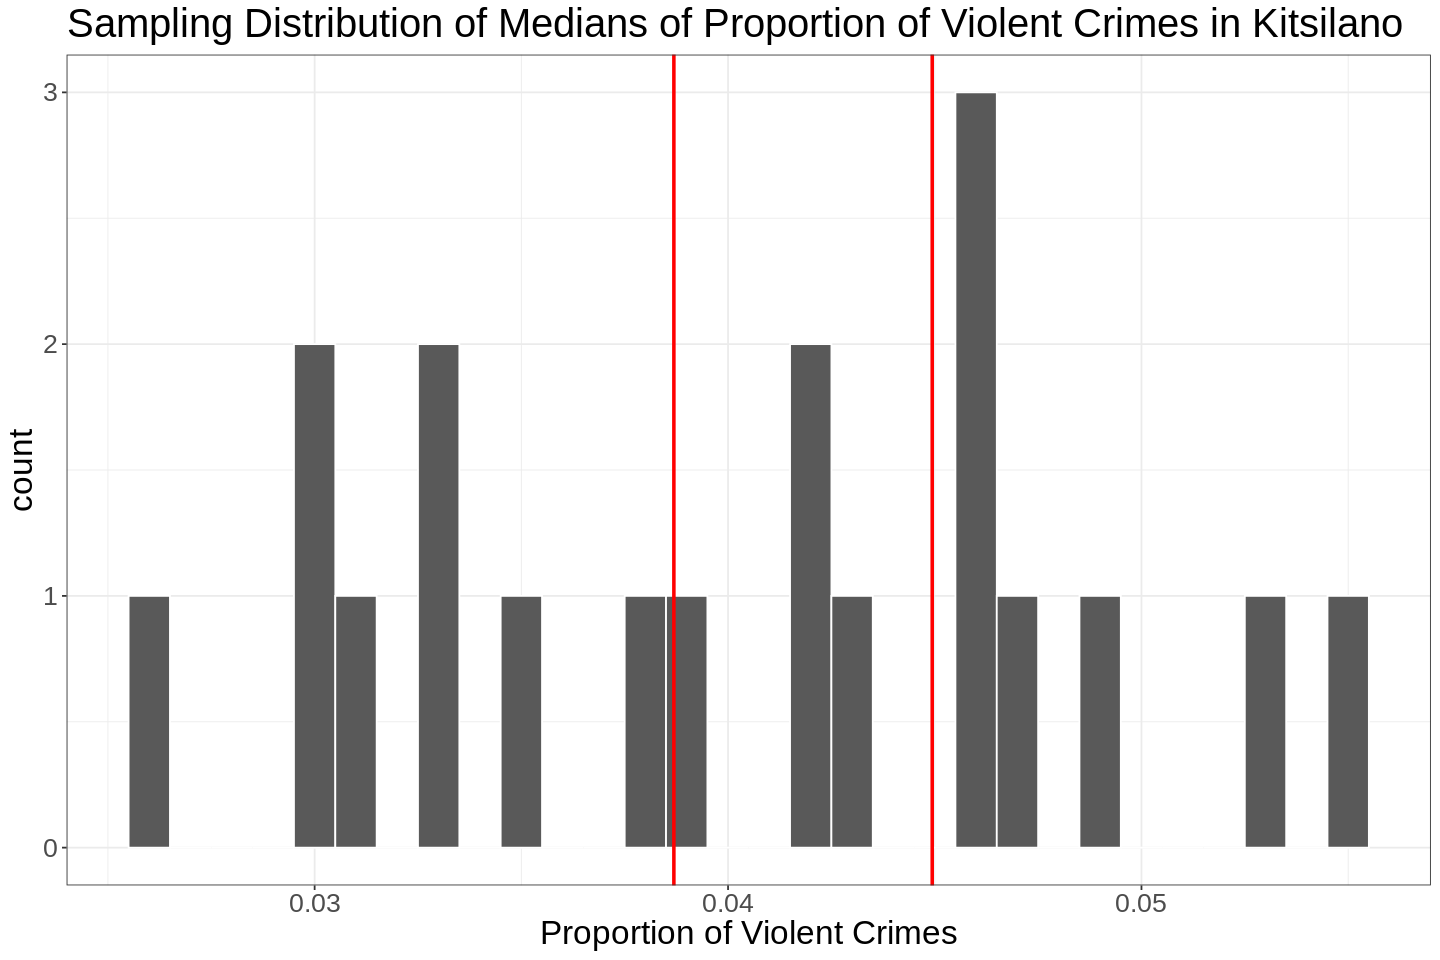

In [42]:
Kitsilano_upper_CLT <- as.numeric(Kitsilano_median_ci$upper_ci)
Kitsilano_lower_CLT <- as.numeric(Kitsilano_median_ci$lower_ci)

options(repr.plot.width = 12, repr.plot.height = 8)
Kitsilano_CLT_plot <- Kitsilano_CLT %>% 
                            ggplot(aes(x = Violent_Crime_Proportion)) +
                            theme_bw() +
                            geom_histogram(binwidth = 0.001, color = 'white')+
                            geom_vline(xintercept = Kitsilano_upper_CLT, colour = "red", size = 1) +
                            geom_vline(xintercept = Kitsilano_lower_CLT, colour = "red", size = 1) +
                            labs(title = "Sampling Distribution of Medians of Proportion of Violent Crimes in Kitsilano",
                            x = "Proportion of Violent Crimes") +
                            theme(text = element_text(size = 20))
Kitsilano_CLT_plot

*Figure 16: Sampling distribution via asymptotics of the median proportion of violent crime in Kitsilano, with 90% confidence intervals*

Finally, the 5% and 95% quantiles for the median of proportions of the violent crimes in the Central Business District are computed, assuming the central limit theorem.

In [43]:
# Use CLT to estimate a 90% CI of proportion median in CBD
CBD_CLT <- crime_proportions %>%
                        filter(NEIGHBOURHOOD == "Central Business District") %>%
                        ungroup()
CBD_median <- median(CBD_CLT$Violent_Crime_Proportion)
CBD_se <- sd(CBD_CLT$Violent_Crime_Proportion)/sqrt(length(CBD_CLT$Violent_Crime_Proportion))
CBD_median_ci <- tibble(
    lower_ci = qnorm(0.05, CBD_median, CBD_se),
    upper_ci = qnorm(0.95, CBD_median, CBD_se)
)
CBD_median_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.08201791,0.09987761


*Table 11: 90% confidence interval of the median of proportions of violent crime in the Central Business District, generated via asymptotics methods*

The sample distribution with the confidence intervals are then plotted.

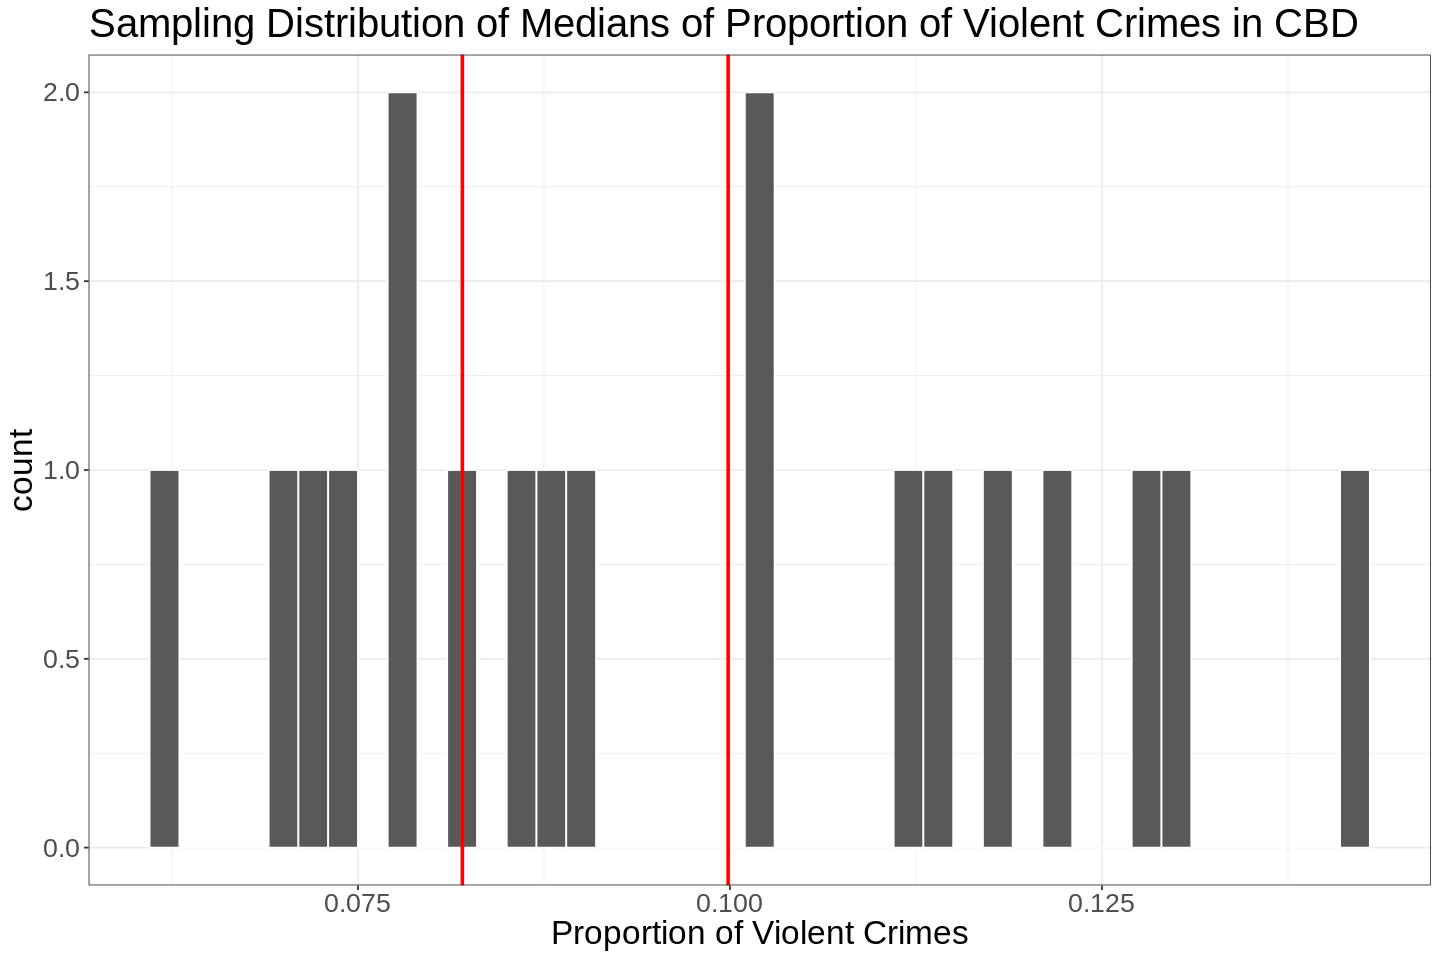

In [44]:
CBD_upper_CLT <- as.numeric(CBD_median_ci$upper_ci)
CBD_lower_CLT <- as.numeric(CBD_median_ci$lower_ci)

options(repr.plot.width = 12, repr.plot.height = 8)
CBD_CLT_plot <- CBD_CLT %>% 
                            ggplot(aes(x = Violent_Crime_Proportion)) +
                            theme_bw() +
                            geom_histogram(binwidth = 0.002, color = 'white')+
                            geom_vline(xintercept = CBD_upper_CLT, colour = "red", size = 1) +
                            geom_vline(xintercept = CBD_lower_CLT, colour = "red", size = 1) +
                            labs(title = "Sampling Distribution of Medians of Proportion of Violent Crimes in CBD",
                            x = "Proportion of Violent Crimes") +
                            theme(text = element_text(size = 20))
CBD_CLT_plot

*Figure 17: Sampling distribution via asymptotics of the median proportion of violent crime in the Central Business District, with 90% confidence intervals*

We notice that generally, the confidence intervals using asymptotics are smaller than the confidence intervals using simulation via bootstrapping for the median of proportion of violent crime in each neighbourhood. 

## Asymptotic Methods for Mean Number of Violent Incidents

Similarly, we will apply the Asymptotic method on the mean value of violent crimes in each neighbourhood. The 90% confidence interval will be generated, and the plots of sampling distribution and intervals will be generated.

To begin, the 5% and 95% quantiles of the mean number of violent crime incidences in West Point Grey are computed, assuming the central limit theorem.

In [45]:
# Use CLT to estimate a 90% CI of Mean Violent Incidents Cases in Point Grey
Point_Grey_mean_CLT <- violent_crime_sum %>%
                             filter(NEIGHBOURHOOD == "West Point Grey") %>%
                             ungroup()
Point_Grey_mean <- mean(Point_Grey_mean_CLT$Violent_Crime_Incidents)
Point_Grey_mean_se <- sd(Point_Grey_mean_CLT$Violent_Crime_Incidents)/sqrt(length(Point_Grey_mean_CLT$Violent_Crime_Incidents))
Point_Grey_mean_ci <- tibble(
    lower_ci = qnorm(0.05, Point_Grey_mean, Point_Grey_mean_se),
    upper_ci = qnorm(0.95, Point_Grey_mean, Point_Grey_mean_se)
)
Point_Grey_mean_ci

lower_ci,upper_ci
<dbl>,<dbl>
20.38784,26.03322


*Table 12: 90% confidence interval of the annual mean of violent crime incidents in West Point Grey, generated via asymptotics methods*

The sample distribution with the confidence interval for the mean number of violent crime incidents in West Point Grey is then plotted.

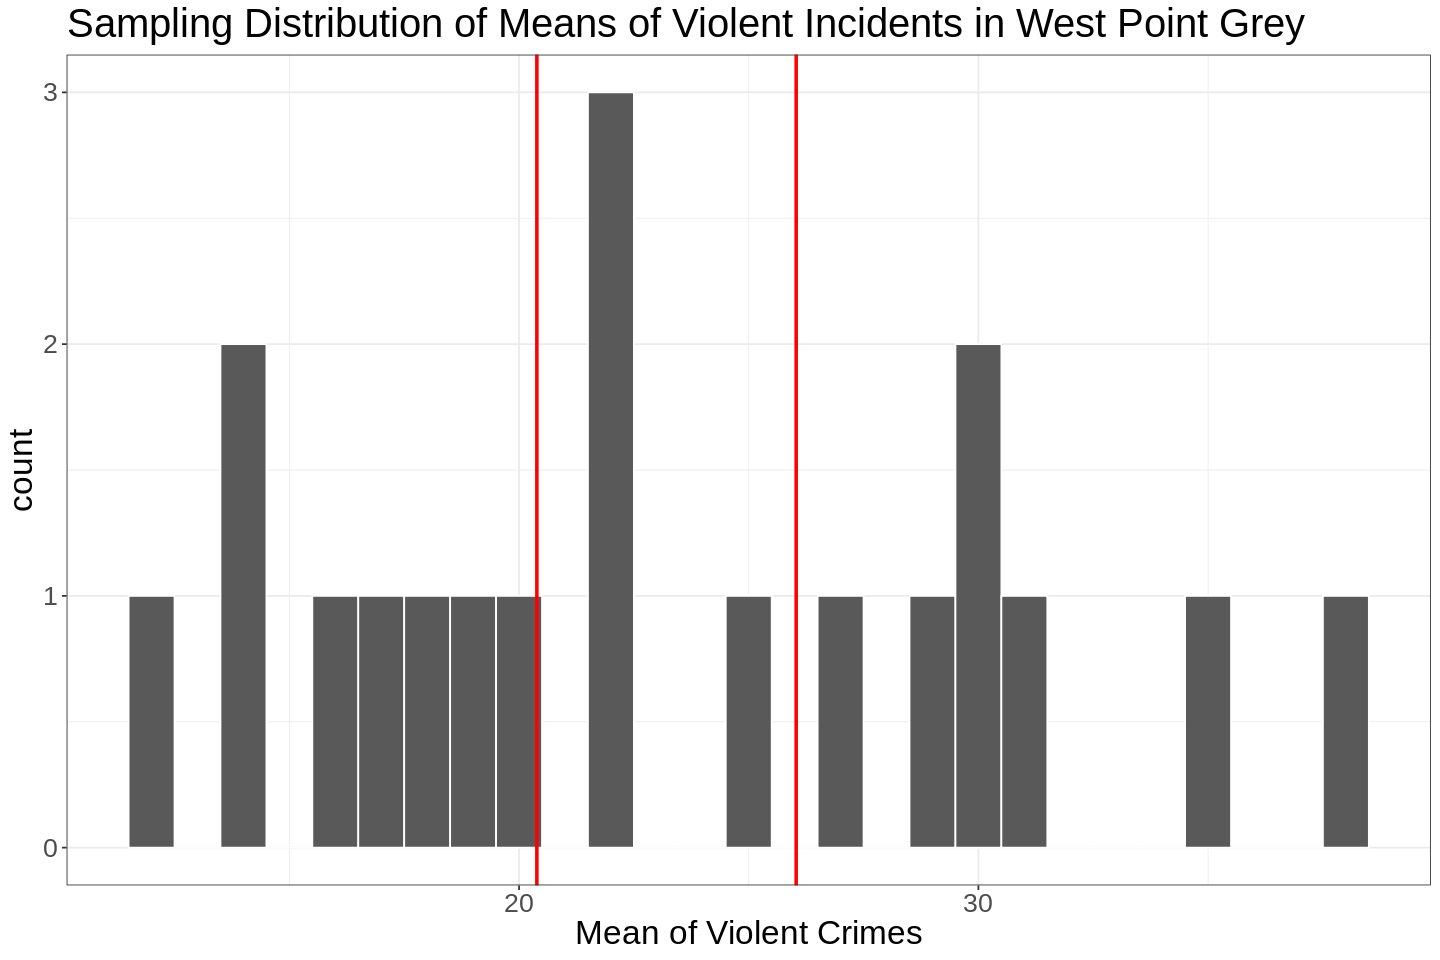

In [46]:
Point_Grey_upper_CLT_mean <- as.numeric(Point_Grey_mean_ci$upper_ci)
Point_Grey_lower_CLT_mean <- as.numeric(Point_Grey_mean_ci$lower_ci)

options(repr.plot.width = 12, repr.plot.height = 8)
Point_Grey_CLT_plot_mean <- Point_Grey_mean_CLT %>% 
                            ggplot(aes(x = Violent_Crime_Incidents)) +
                            theme_bw() +
                            geom_histogram(binwidth = 1, color = 'white') +
                            geom_vline(xintercept = Point_Grey_upper_CLT_mean, colour = "red", size = 1) +
                            geom_vline(xintercept = Point_Grey_lower_CLT_mean, colour = "red", size = 1) +
                            labs(title = "Sampling Distribution of Means of Violent Incidents in West Point Grey",
                            x = "Mean of Violent Crimes") +
                            theme(text = element_text(size = 20))
Point_Grey_CLT_plot_mean

*Figure 18: Sampling distribution via asymptotics of the mean of violent crimes in West Point Grey, with 90% confidence intervals*

Similarly, the 5% and 95% quantiles of the mean number of violent crime incidences in Kitsilano are computed, assuming the central limit theorem.

In [47]:
# Use CLT to estimate a 90% CI of Mean Violent Incidents Cases in Kitsilano
Kitsilano_mean_CLT <- violent_crime_sum %>%
                             filter(NEIGHBOURHOOD == "Kitsilano") %>%
                             ungroup()
Kitsilano_mean <- mean(Kitsilano_mean_CLT$Violent_Crime_Incidents)
Kitsilano_mean_se <- sd(Kitsilano_mean_CLT$Violent_Crime_Incidents)/sqrt(length(Kitsilano_mean_CLT$Violent_Crime_Incidents))
Kitsilano_mean_ci <- tibble(
    lower_ci = qnorm(0.05, Kitsilano_mean, Kitsilano_mean_se),
    upper_ci = qnorm(0.95, Kitsilano_mean, Kitsilano_mean_se)
)
Kitsilano_mean_ci

lower_ci,upper_ci
<dbl>,<dbl>
75.713,92.07647


*Table 13: 90% confidence interval of the annual mean of violent crime incidents in Kitsilano, generated via asymptotics methods*

The sample distribution with the confidence interval for the mean number of violent crime incidents in Kitsilano is then plotted.

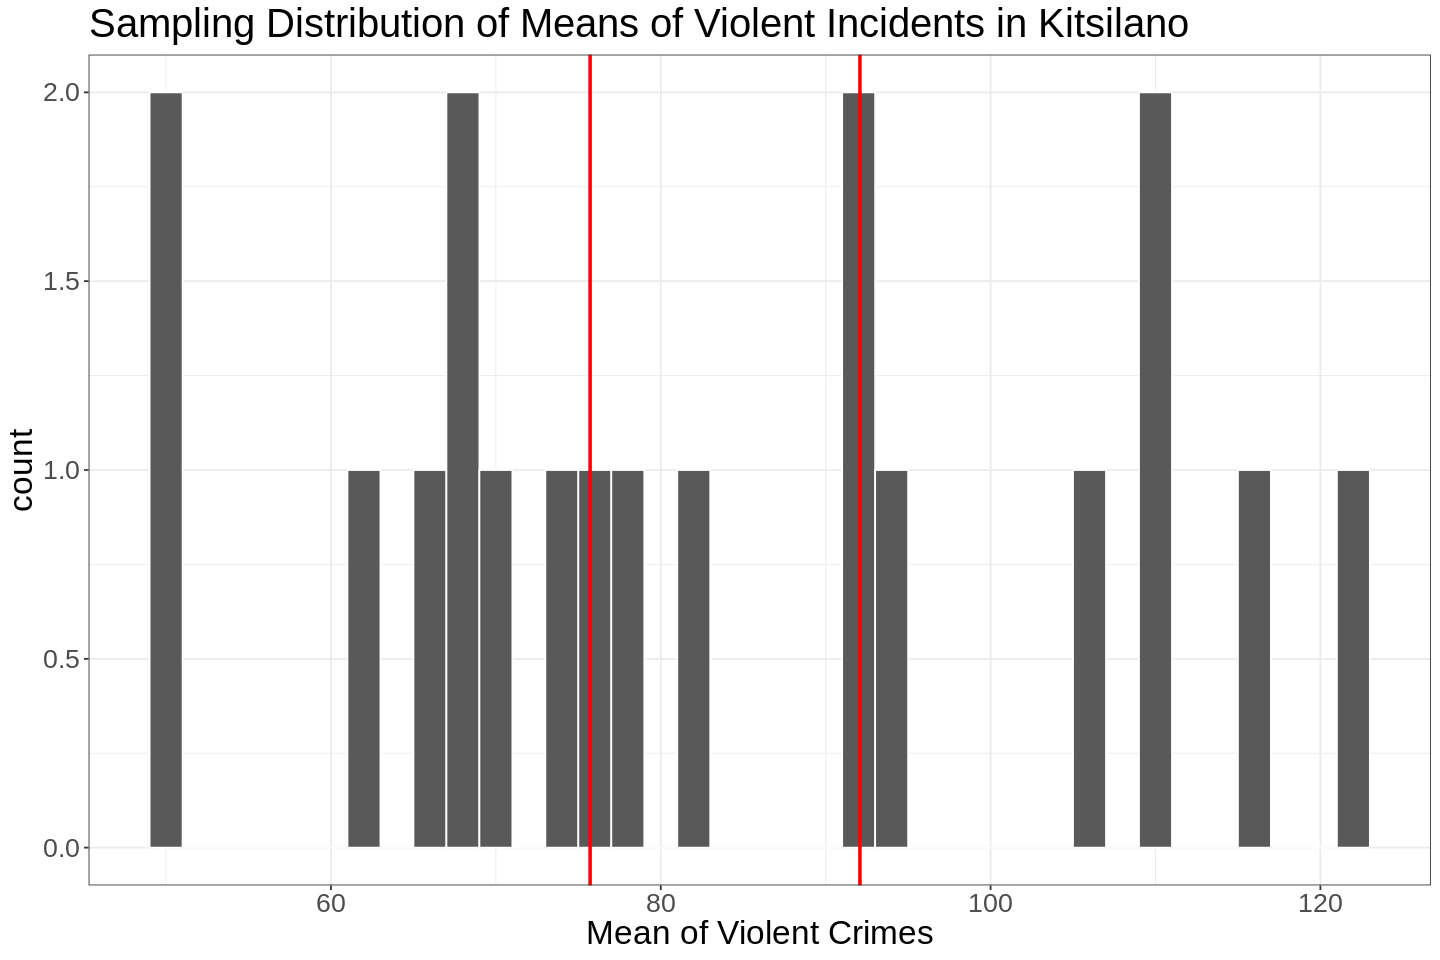

In [48]:
Kitsilano_upper_CLT_mean <- as.numeric(Kitsilano_mean_ci$upper_ci)
Kitsilano_lower_CLT_mean <- as.numeric(Kitsilano_mean_ci$lower_ci)

options(repr.plot.width = 12, repr.plot.height = 8)
Kitsilano_CLT_plot_mean <- Kitsilano_mean_CLT %>% 
                            ggplot(aes(x = Violent_Crime_Incidents)) +
                            theme_bw() +
                            geom_histogram(binwidth = 2, color = 'white') +
                            geom_vline(xintercept = Kitsilano_upper_CLT_mean, colour = "red", size = 1) +
                            geom_vline(xintercept = Kitsilano_lower_CLT_mean, colour = "red", size = 1) +
                            labs(title = "Sampling Distribution of Means of Violent Incidents in Kitsilano",
                            x = "Mean of Violent Crimes") +
                            theme(text = element_text(size = 20))
Kitsilano_CLT_plot_mean

*Figure 19: Sampling distribution via asymptotics of the mean of violent crimes in Kitsilano, with 90% confidence intervals*

Finally, the 5% and 95% quantiles of the mean number of violent crime incidences in West Point Grey are computed, assuming the central limit theorem.

In [49]:
# Use CLT to estimate a 90% CI of Mean Violent Incidents Cases in CBD
CBD_mean_CLT <- violent_crime_sum %>%
                             filter(NEIGHBOURHOOD == "Central Business District") %>%
                             ungroup()
CBD_mean <- mean(CBD_mean_CLT$Violent_Crime_Incidents)
CBD_mean_se <- sd(CBD_mean_CLT$Violent_Crime_Incidents)/sqrt(length(CBD_mean_CLT$Violent_Crime_Incidents))
CBD_mean_ci <- tibble(
    lower_ci = qnorm(0.05, CBD_mean, CBD_mean_se),
    upper_ci = qnorm(0.95, CBD_mean, CBD_mean_se)
)
CBD_mean_ci

lower_ci,upper_ci
<dbl>,<dbl>
1018.332,1127.878


*Table 14: 90% confidence interval of the annual mean of violent crime incidents in the Central Business District, generated via asymptotics methods*

The sample distribution with the confidence interval for the mean number of violent crime incidents in the Central Business District is then plotted.

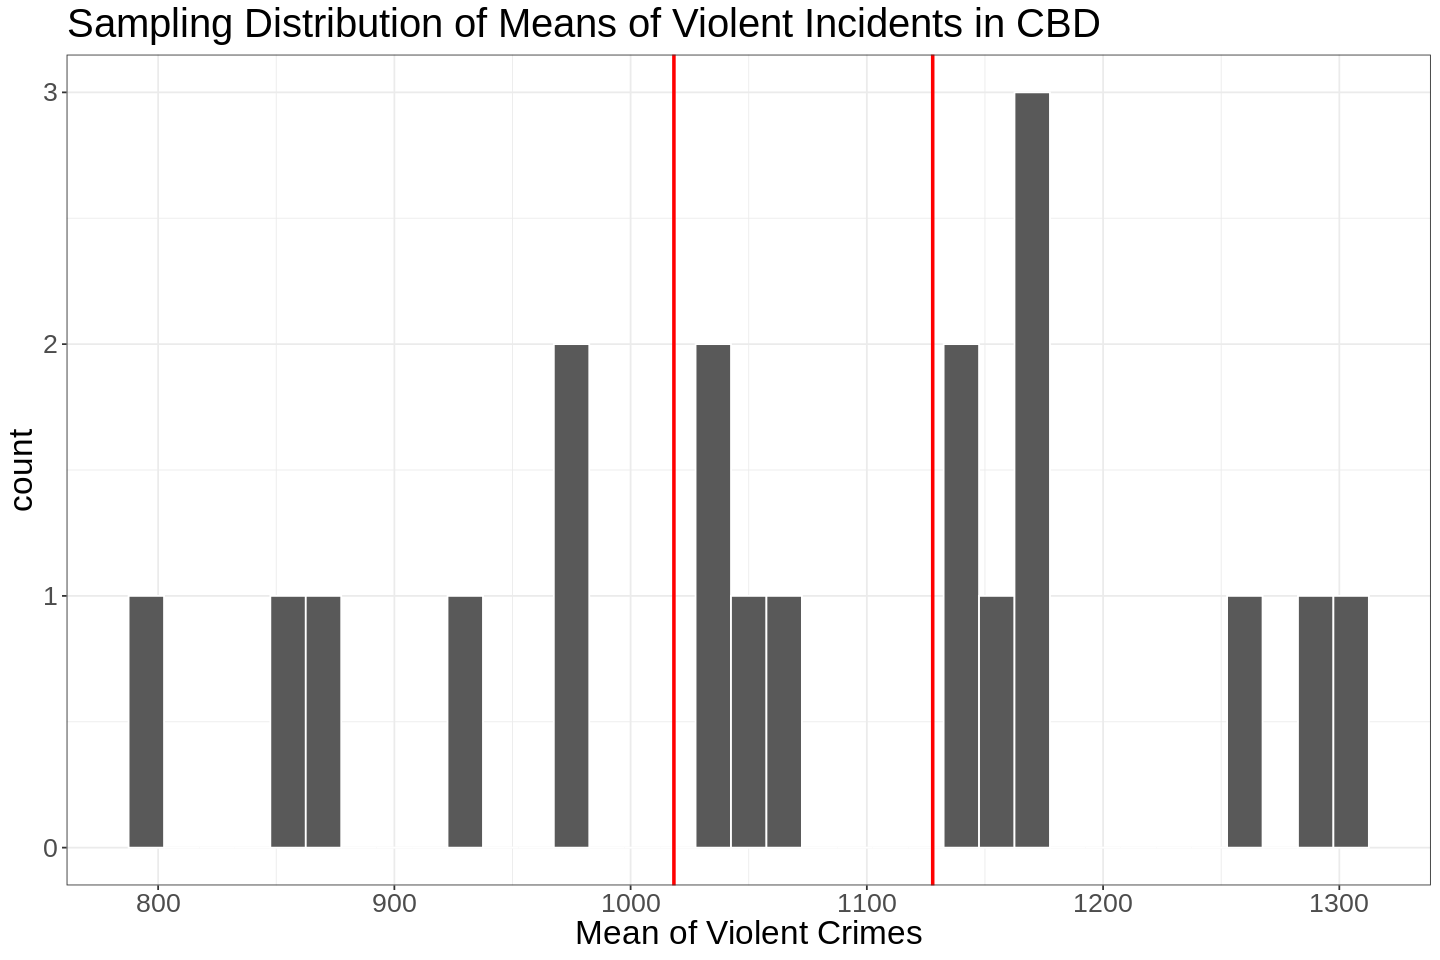

In [50]:
CBD_upper_CLT_mean <- as.numeric(CBD_mean_ci$upper_ci)
CBD_lower_CLT_mean <- as.numeric(CBD_mean_ci$lower_ci)

options(repr.plot.width = 12, repr.plot.height = 8)
CBD_CLT_plot_mean <- CBD_mean_CLT %>% 
                            ggplot(aes(x = Violent_Crime_Incidents)) +
                            theme_bw() +
                            geom_histogram(binwidth = 15, color = 'white') +
                            geom_vline(xintercept = CBD_upper_CLT_mean, colour = "red", size = 1) +
                            geom_vline(xintercept = CBD_lower_CLT_mean, colour = "red", size = 1) +
                            labs(title = "Sampling Distribution of Means of Violent Incidents in CBD",
                            x = "Mean of Violent Crimes") +
                            theme(text = element_text(size = 20))
CBD_CLT_plot_mean

*Figure 20: Sampling distribution via asymptotics of the mean of violent crimes in the Central Business District, with 90% confidence intervals*

Generally, there is agreement between the confidence intervals created using the asymptotics and simulation via bootstrapping methods. However, we have more confidence in the confidence intervals generated by the bootstrapping method, because our sample is too small for us to be able to assume the central limit theorem. To be able to assume the central limit theorem, the sample size must be large enough, and with a sample size of only 19, this is too small.

## Hypothesis Testing

We now test the hypothesis suggested by the literature, that neighbourhoods that the further a neighbourhood is from the central business district, the lower amount of violent crime it experiences. Since West Point Grey is further than Kitsilano to the Central Business District, we would hypothesize that West Point Grey has lower occurrences of violent crime. 

To compute the hypothesis test, we will test the null hypothesis that the mean yearly occurrence of violent crime experienced by Kitsilano and West Point Grey are equal. Our alternative hypothesis is that Kitsilano has a higher yearly mean of violent crimes. We will choose a significance level of 0.01%.

First, the observed difference in the mean of violent crimes between Kitsilano and West Point Grey in our data set is calculated.

In [51]:
Kits_WPG_violent_crime <- violent_crime_sum  %>% 
    filter(NEIGHBOURHOOD != "Central Business District")

obs_diff_in_means <- 
    Kits_WPG_violent_crime  %>% 
    specify(formula = Violent_Crime_Incidents ~ NEIGHBOURHOOD) %>%
    calculate(stat = "diff in means", order = c("Kitsilano", "West Point Grey"))
obs_diff_in_means
   

stat
<dbl>
60.68421


We find the observed difference in the mean number of violent crimes between Kitsilano and West Point Grey to be 60.68.

Next, we generate the null distribution using simulation via bootstrapping. We choose to generate the null hypothesis via bootstrapping because we have a small, not-normally distributed sample; thus, we cannot assume that the Central Limit Theorem will work.

In [52]:
null_diff_in_means <- 
    Kits_WPG_violent_crime %>% 
    specify(formula = Violent_Crime_Incidents ~ NEIGHBOURHOOD) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("Kitsilano", "West Point Grey"))

We then visualize the null distribution, and annotate on the figure the sample difference of means. It can be observed from the figure that the sample statistic is far to the right of the null distribution.

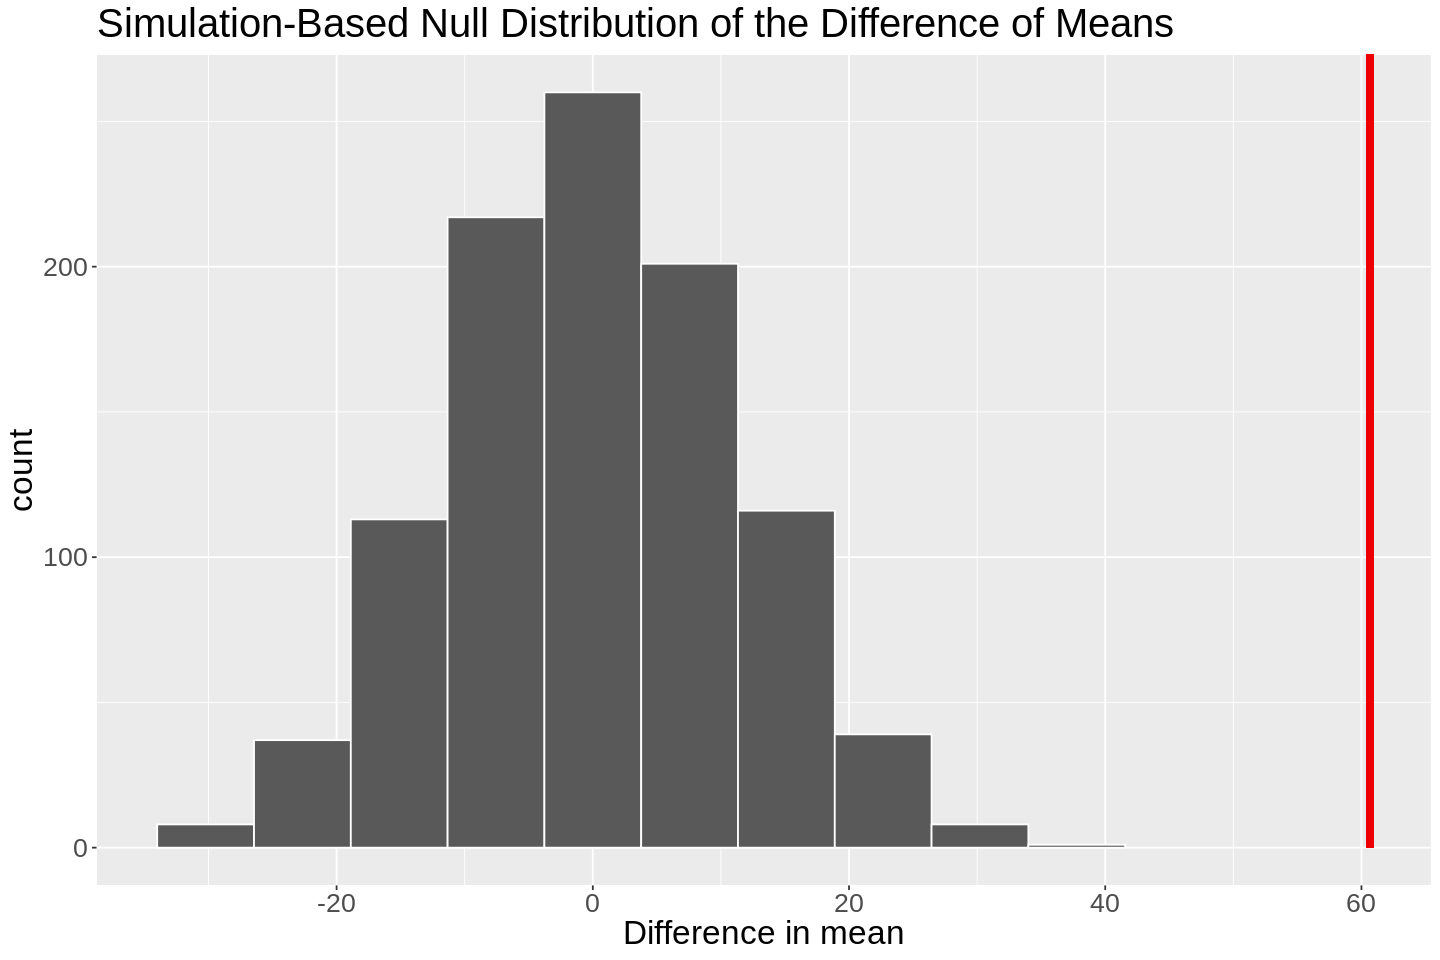

In [53]:
options(repr.plot.width = 12, repr.plot.height = 8)
diff_in_means_plot <-
    visualize(null_diff_in_means, bins = 10) + 
    shade_p_value(obs_stat = obs_diff_in_means, direction = "right") +
    xlab("Difference in mean") +
    ggtitle("Simulation-Based Null Distribution of the Difference of Means")+
    theme(text = element_text(size = 20))

diff_in_means_plot

*Figure 21: Simulation-based null distribution of the difference of mean violent crime occurrences in West Point Grey and Kitsilano, with the test statistic*

The p-value is finally calculated.

In [54]:
p_val <-
    null_diff_in_means %>% 
    get_p_value(obs_stat =  obs_diff_in_means, direction = "right")

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


We find that the p-value of the null hypothesis is <0.0000001, which is less than our significance value of 0.01%. This means that there is less than a 0.00001 percent chance of observing a test statistic that is at least as extreme as the observed test statistic, given that the null hypothesis, that the yearly mean of violent crime occurrences in West Point Grey and Kitsilano are equal, is true. Since our p-value is less than our pre-determined significance level, we reject the null hypothesis.

## Discussion

To review the aim of the project, our research aimed to further understand how crime incidences vary by geographic locations in Vancouver. We hoped to answer the question "between Point Grey, Kitsilano, and the Central Business District, how does geographic location affect violent crime incidents?" using The Vancouver Crime data set. We calculated two quantities of interest: The median yearly proportion of violent crime in each neighborhood between the years 2003 and 2021, and the mean yearly count of violent crime in each neighborhood between the years 2003 and 2021. The findings of this data analysis is summarized below:

In [55]:
median_violent_crime_proportions

NEIGHBOURHOOD,Median_Proportion
<chr>,<dbl>
Central Business District,0.09094776
Kitsilano,0.04181390
West Point Grey,0.04988662


*Table 15: Median violent crime proportions per year in Point Grey, Kitsilano, and the Central Business District between 2003 and 2021*

In [56]:
violent_crime_mean

NEIGHBOURHOOD,Mean
<chr>,<dbl>
Central Business District,1073.10526
Kitsilano,83.89474
West Point Grey,23.21053


*Table 16: Mean violent crime proportions per year in Point Grey, Kitsilano, and the Central Business District between 2003 and 2021*

We are 90% confident that the true median of violent crime proportion is captured by the interval 3.95% - 6.11% in West Point Grey, 3.52% - 4.57% in Kitsilano, and 8.11% - 11.28% in the Central Business District.

Further, we are 90% confident that the true mean of violent crime incidents is captured by the interval 20.4 - 26.0 in West Point Grey, 75.6 - 91.8 in Kitsilano, and 1017.6 - 1126.2 in the Central Business District.

We computed 90% confidence intervals for each statistic using two methods: simulation via bootstrapping, and asymptotics. However, due to the nature of our sample, asymptotics proved to be insufficient method. In order to calculate confidence intervals using the Central Limit Theorem, the we must ensure that the sample is large enough, the sample is taken in a random fashion, and the estimator is a sum of random components. 

However, the distribution of the Asymptotic method is not as expected. Under the Central Limit Theorem, the sampling distribution will be approximately a Normal distribution, if the sample size is large. However, the dataset only ranged from 2003 to 2021, a total of 18 years, which is relatively small. Hence, the sampling distribution is not a Normal shape, and we cannot confidently apply the CLT. Thus, simulation methods via bootstrapping is the more reliable method to compute the confidence intervals.

We also conducted a hypothesis test to test the null hypothesis that the amount of violent crimes in Kitsilano and Point Grey are the same. Our hypothesis test using simulation via bootstrapping methods found that there is less than a 0.00001 percent chance of observing a test statistic that would indicate that there is no difference in means between Point Grey and Kitsilano. Therefore, we reject the null hypothesis, that the yearly mean occurrences of violent crime incidents in West Point Grey and Kitsilano are equal. This is also what is suggested in the current literature, that violent crime incidents decrease as one moves further away from the centre of Vancouver.

We found that, as expected, the central business district has the highest value for both of parameters we calculated: median proportion of crimes and the yearly average violent crime number. Kitsilano had the lowest median proportion of violent crimes, and West Point Grey had the lowest average violent crime number. Through this analysis of violent crime in Vancouver, we can observe a preliminary trend that violent crime is the most concentrated in the Central Business District, and is significantly lower in outside neighbourhoods. With this knowledge, violent crime interventions can be more effectively targeted and planned. 

Often, violent crime is a result from other underlying social challenges, such as poverty, and so, a picture of the social inequality existing in Vancouver can also be inferred from this data analysis. Thus, an interesting further area of research would be to compare poverty rates, in different neighbourhoods in Vancouver, and compare it to the findings of this data analysis to preliminarily identify whether a relationship between violent crime and socioeconomic status exists.


## References

Andresen, M. (2006). A spatial analysis of crime in Vancouver, British Columbia: A synthesis of social disorganization and routine activity theory. The Canadian Geographer / Le Géographe Canadien, 50(4), 487–502. https://doi.org/10.1111/j.1541-0064.2006.00159.x 

Vancouver Police Department. (2022). Vancouver crime data [Data file]. Retrieved from https://geodash.vpd.ca/opendata/#

Walker, B. B., Schuurman, N., &amp; Hameed, S. M. (2014). A GIS-based spatiotemporal analysis of violent trauma hotspots in Vancouver, Canada: Identification, contextualisation and intervention. BMJ Open, 4(2). https://doi.org/10.1136/bmjopen-2013-003642 